In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import pip as pip

pip.main(['install', 'nltk'])
pip.main(['install', 'textblob'])

import nltk
from nltk.corpus import stopwords

# download files needed for nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets_csv = pd.read_csv("tweets.csv", encoding='latin-1')

# Regex taken from
# https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression/8377440#8377440
def clean_tweet(tweet):
        return (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())).lower()
    
tweets_csv['text'] = tweets_csv['text'].astype('unicode').apply(clean_tweet)
tweets = tweets_csv["text"]

You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
word_count = dict()

# Clean and tokenize the plots, then count the appearance of each word in the tweets
for index, tweet in tweets.iteritems():
    #words = nltk.word_tokenize(clean_tweet(str(tweet).lower()))
    words = nltk.word_tokenize(str(tweet))
    filtered_words = [word for word in words if not word.lower() in stopwords.words('english')]
    for word in filtered_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

In [7]:
import datetime

# For purposes of filling in all dates with 0 for tweet count below, find the dates of the earliest and the latest tweets
earliest_tweet = datetime.date(2017, 1, 1)
latest_tweet = datetime.date(2016, 12, 31)

for index, date in tweets_csv["created_str"].iteritems():
    sdate = str(date)[0:10].split('-')
    if sdate[0] != 'nan' and sdate[1] != 'nan' and sdate[2] != 'nan':
        date = datetime.date(int(sdate[0]), int(sdate[1]), int(sdate[2]))
        if date < earliest_tweet:
            earliest_tweet = date
        if date > latest_tweet:
            latest_tweet = date
        
print("Earliest tweet tweeted on: " + str(earliest_tweet))
print("Latest tweet tweeted on: " + str(latest_tweet))

Earliest tweet tweeted on: 2014-07-14
Latest tweet tweeted on: 2017-09-26


In [4]:
# filter for strings containing 3 or more characters which have been mentioned at least 100 times
filtered_count = {k:v for (k,v) in word_count.items() if len(k) > 2 and v >= 100}
sorted_count = sorted(filtered_count.items(), key=lambda x:x[1], reverse=True )

# To view the counts for each word, uncomment the next 2 lines

#for key, count in sorted_count:
    #print(key + " " + str(count))

{'america': 3743, 'donald': 4876, 'president': 3500, 'gop': 2387, 'donald and trump': 33411, 'maga': 2728, 'politics': 4222, 'isis': 1559, 'world': 2356, 'american': 2247, 'democrats': 1254, 'black': 3300, 'clinton': 11949, 'white': 2613, 'hillary': 11199, 'campaign': 2523, 'muslim': 1376, 'news': 4611, 'dnc': 1382, 'obama': 9116, 'hillary and clinton': 23148, 'trump': 28535, 'election': 2764}


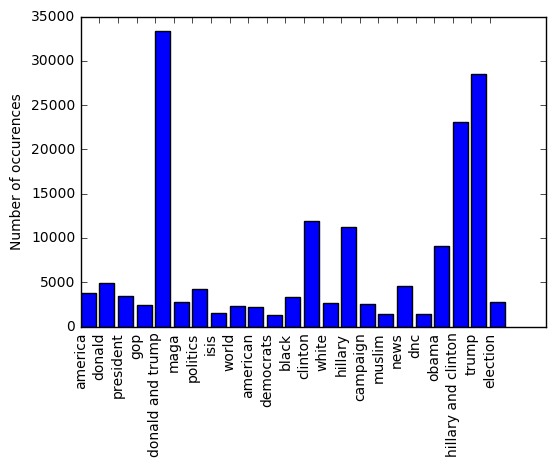

In [12]:
# Based on word counts, we chose these words to analyze below
selected = {
    'trump' : filtered_count["trump"],
    'clinton' : filtered_count["clinton"],
    'hillary' : filtered_count["hillary"],
    'obama': filtered_count["obama"],
    'donald': filtered_count["donald"],
    'politics': filtered_count["politics"],
    'news': filtered_count["news"],
    'america': filtered_count["america"],
    'president': filtered_count["president"],
    'black': filtered_count["black"],
    'election': filtered_count["election"],
    'gop': filtered_count["gop"],
    'maga': filtered_count["maga"],
    'campaign': filtered_count["campaign"],
    'world': filtered_count["world"],
    'white': filtered_count["white"],
    'american': filtered_count["american"],
    'dnc': filtered_count["dnc"],
    'muslim': filtered_count["muslim"],
    'democrats': filtered_count["democrats"],
    'isis': filtered_count["isis"],
    'hillary and clinton':filtered_count["hillary"] + filtered_count["clinton"],
    'donald and trump': filtered_count["trump"] + filtered_count["donald"]
}

print(selected)

plt.bar(range(len(selected)), selected.values())
plt.xticks(range(len(selected)), selected.keys(), rotation="vertical")
plt.ylabel("Number of occurences")
plt.show()

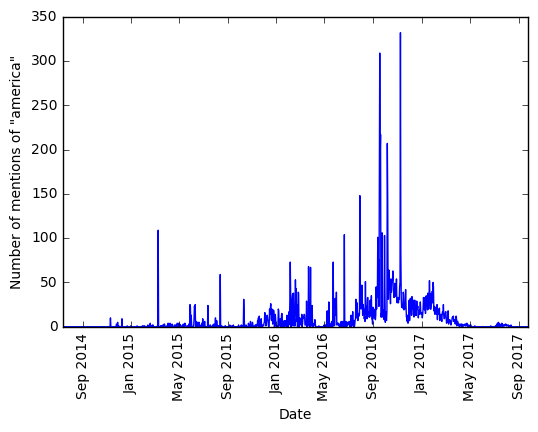

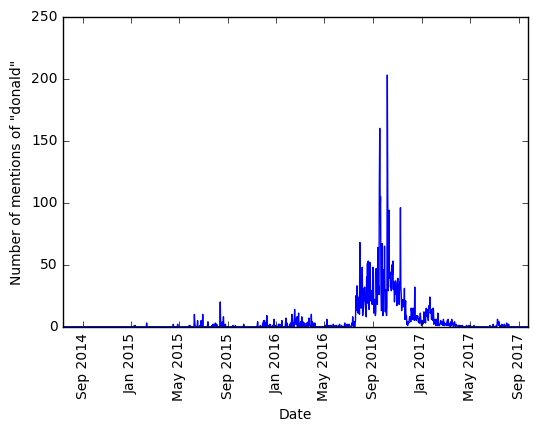

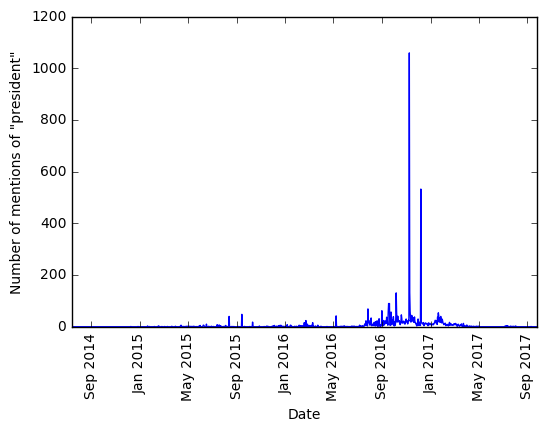

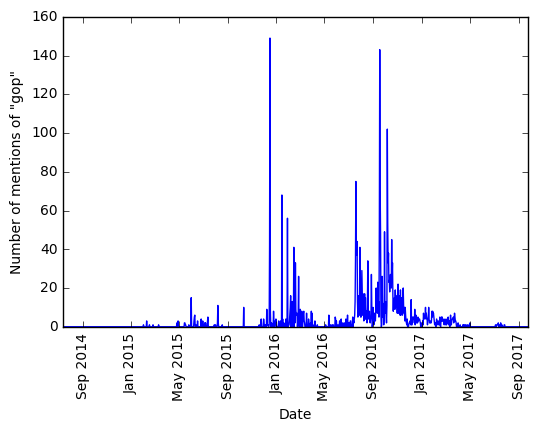

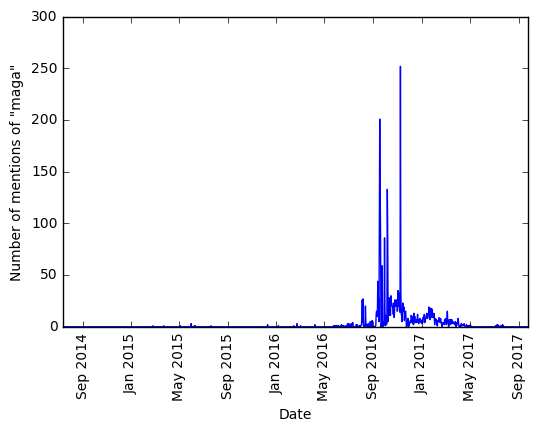

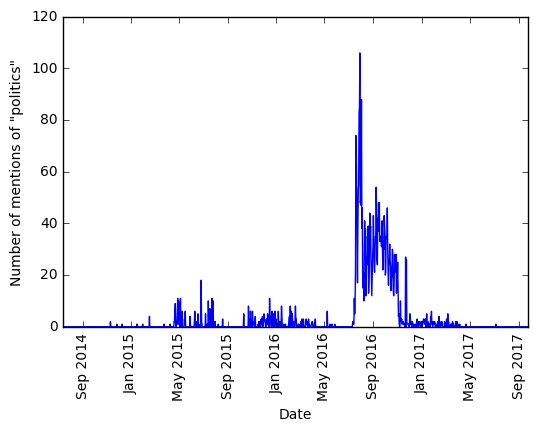

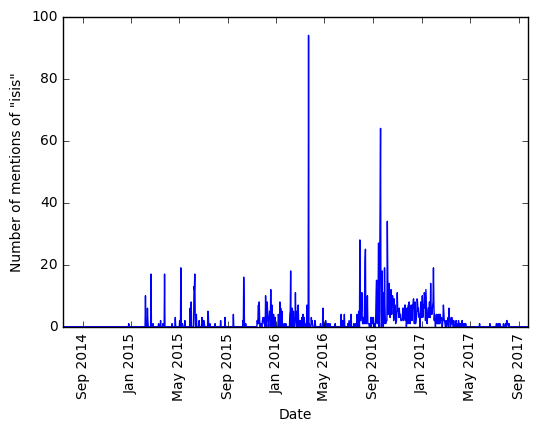

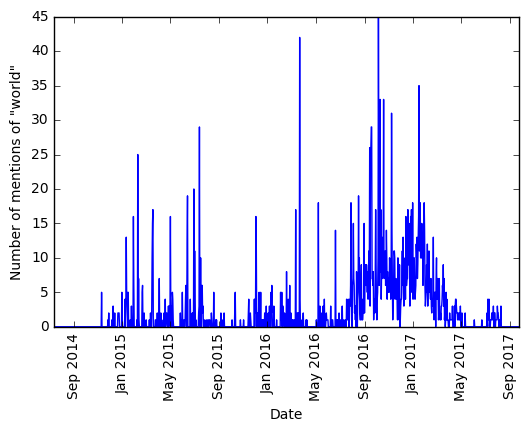

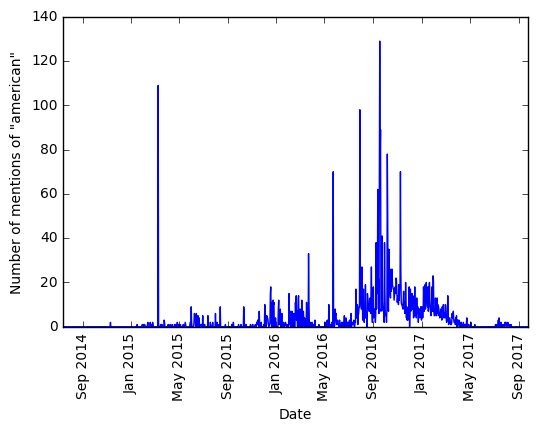

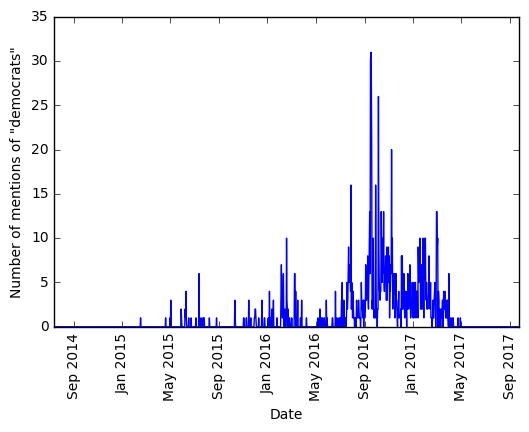

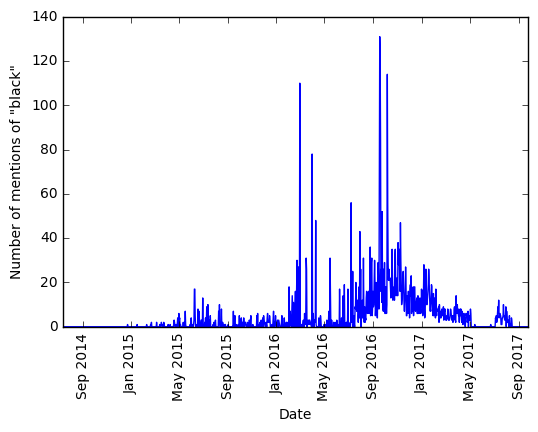

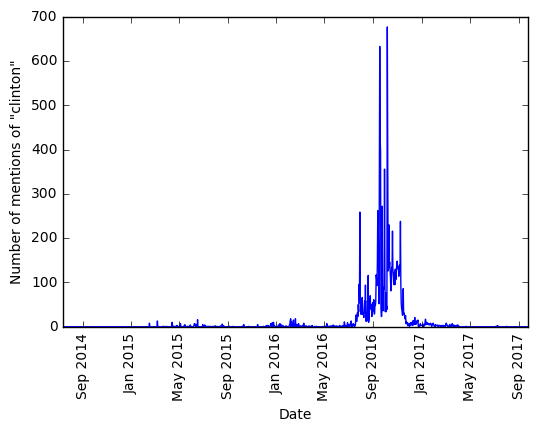

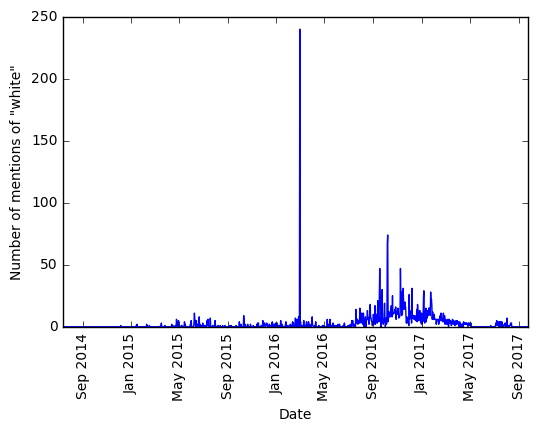

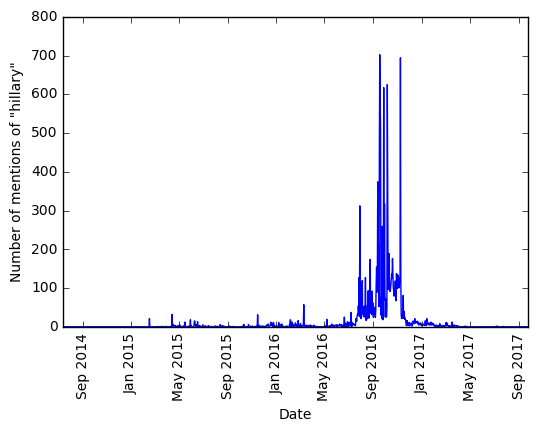

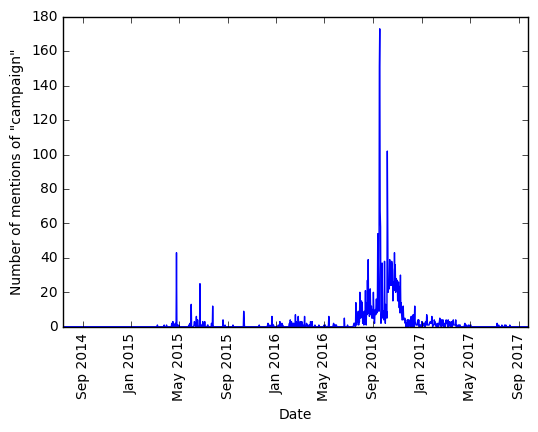

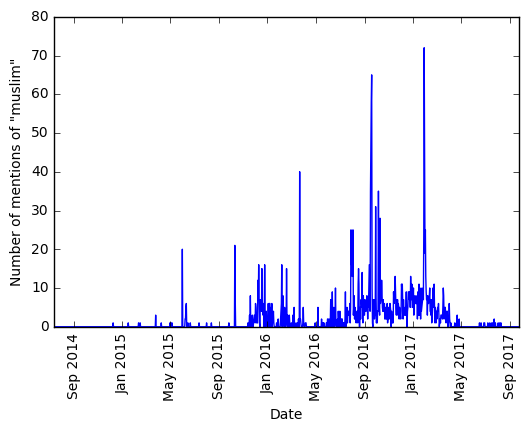

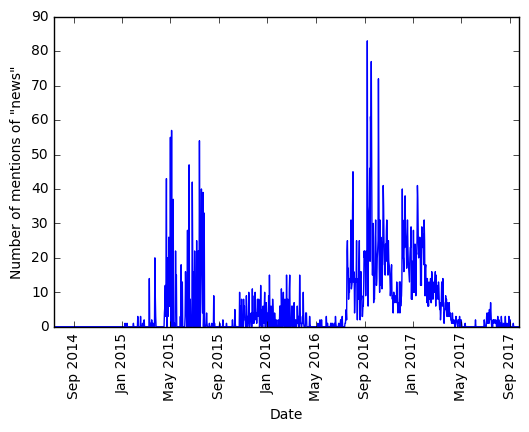

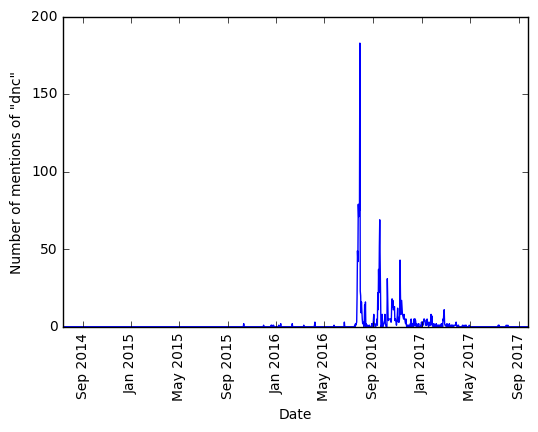

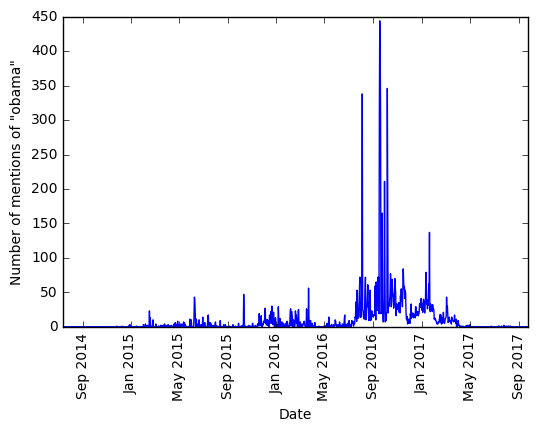

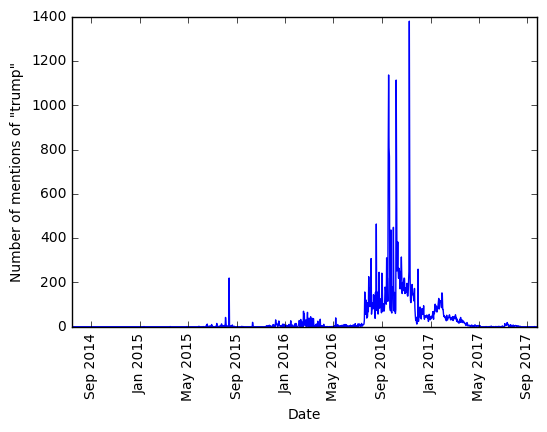

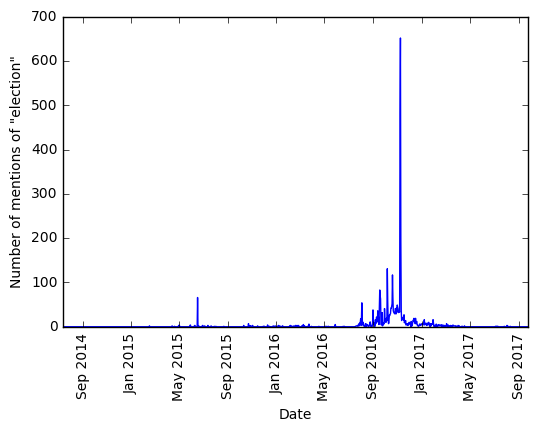

In [32]:
import datetime

# Return the number of times a word appeared in a tweet on a given day, with the returned list sorted by date
def GetDates(word):
    datesFrame = tweets_csv[tweets_csv['text'].str.contains(word) == True]

    dateCount = dict()
    
    for day in range(int((latest_tweet - earliest_tweet).days)):
        dateCount[earliest_tweet + datetime.timedelta(day)] = 0

    for index, date in datesFrame['created_str'].iteritems():
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
    
        if (sdate in dateCount):
            dateCount[sdate] += 1
        else:
            dateCount[sdate] = 1
        
    orderedTweetCount = sorted(dateCount.items(), key=lambda x:x[0], reverse=True)
    return orderedTweetCount

def PlotMentions(tweets, word, dateRange = None):
    x_val = [x[0] for x in tweets]
    y_val = [x[1] for x in tweets]
    
    plt.plot(x_val, y_val)
    plt.xticks(rotation=90)
    plt.ylabel("Number of mentions of \"" + word + "\"")
    plt.xlabel("Date")
    
    if (dateRange != None):
        plt.xlim(dateRange[0], dateRange[1])
        
    plt.show()
    
for word in selected.keys():
    PlotMentions(GetDates(word), word)

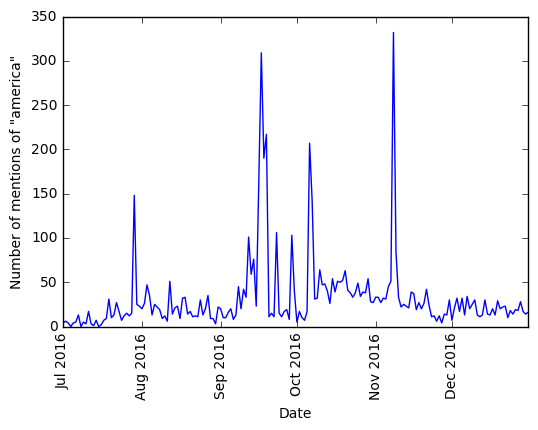

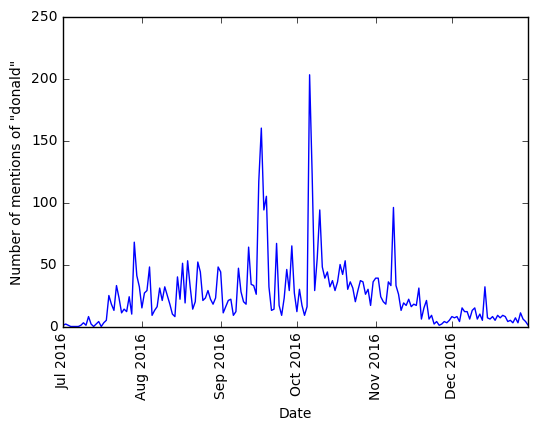

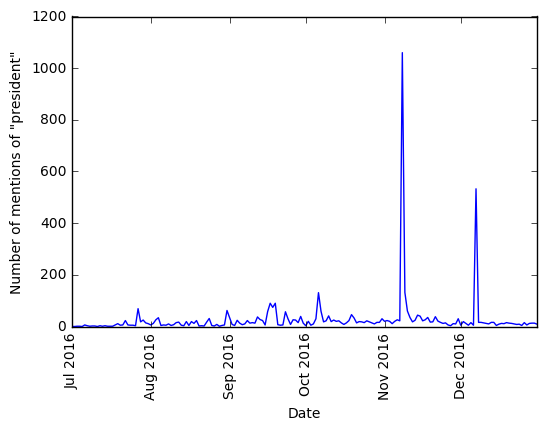

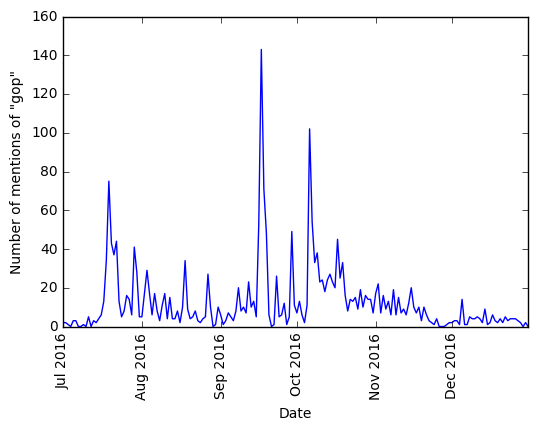

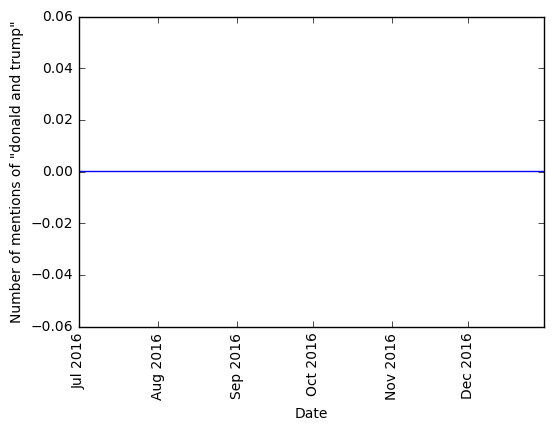

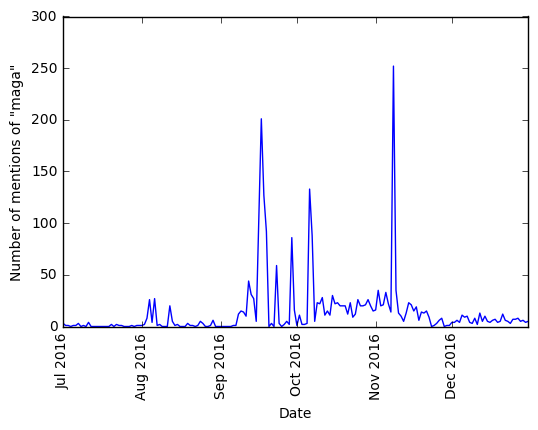

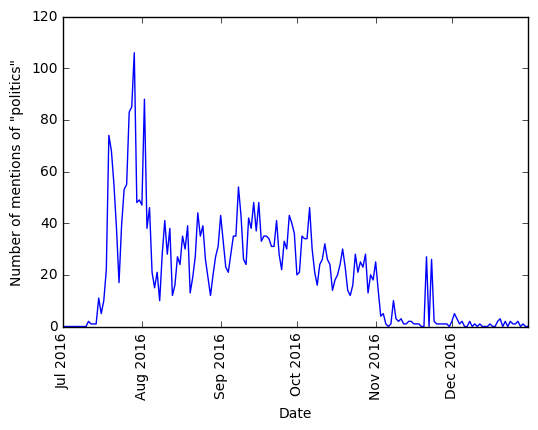

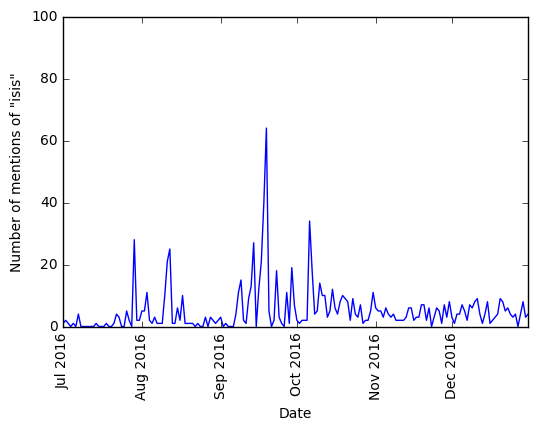

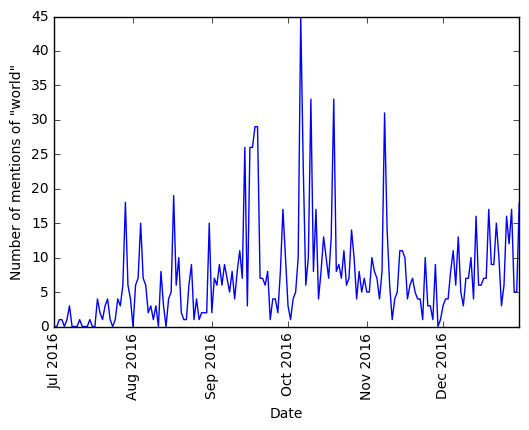

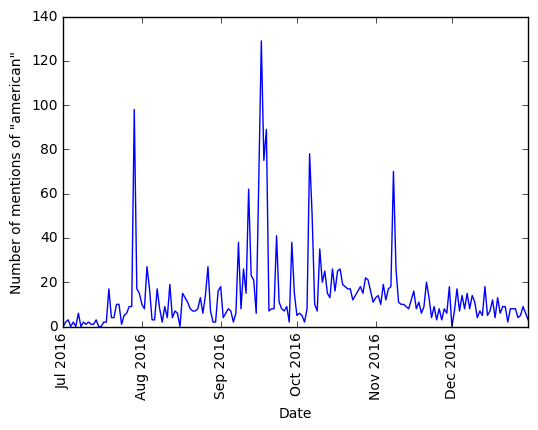

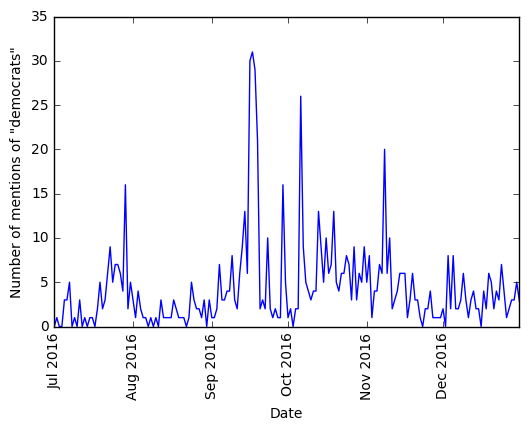

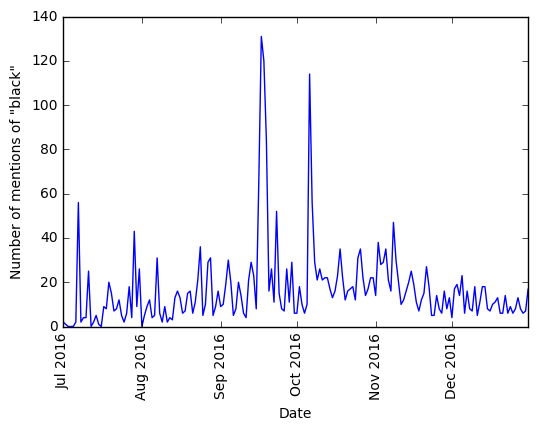

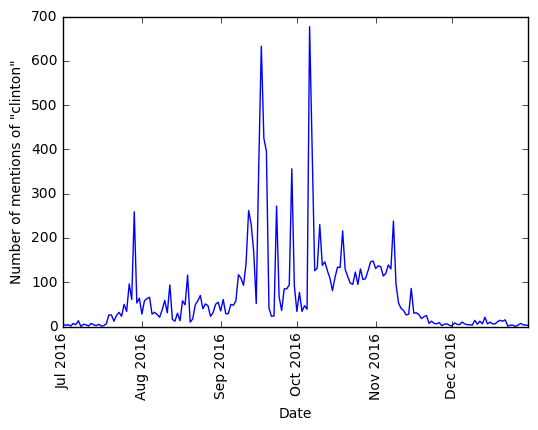

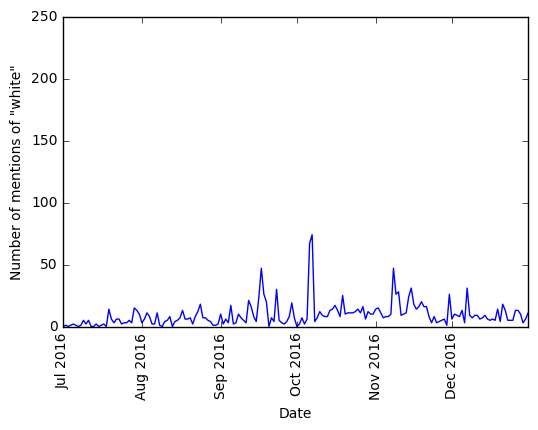

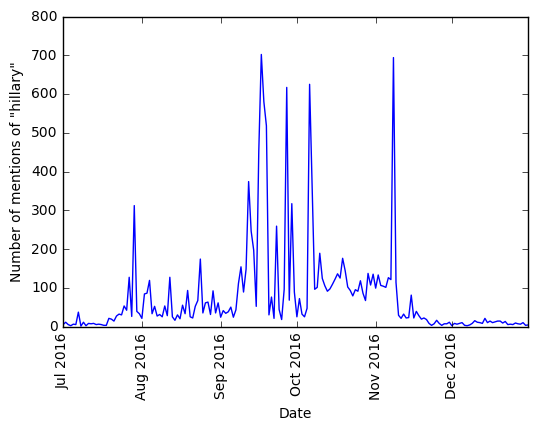

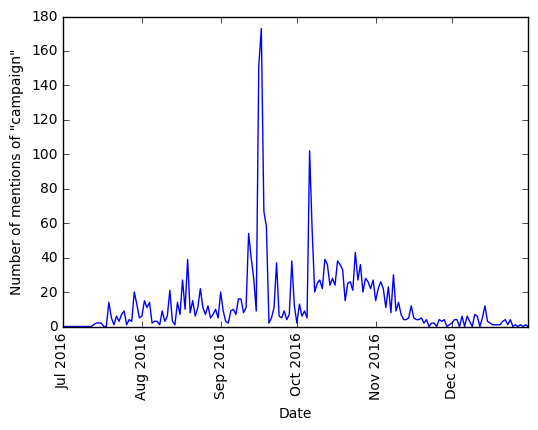

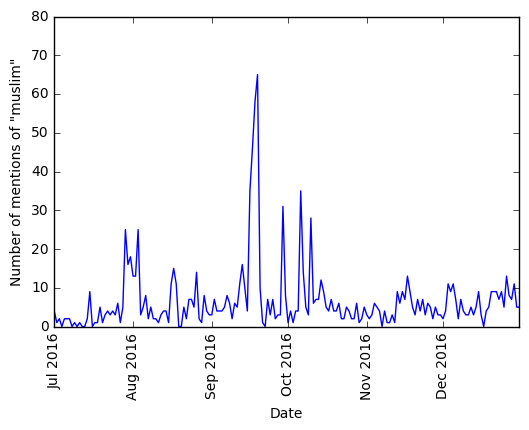

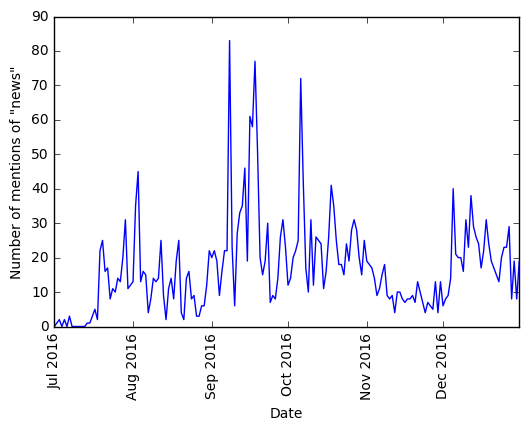

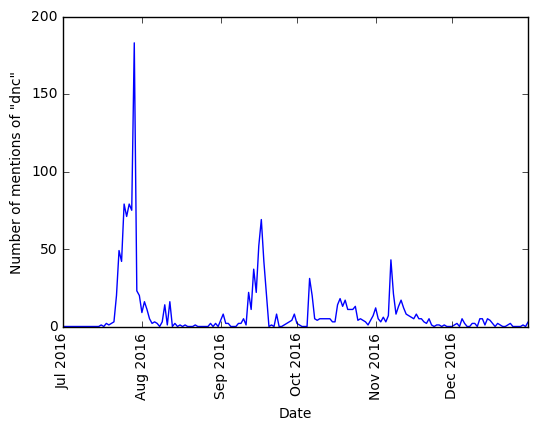

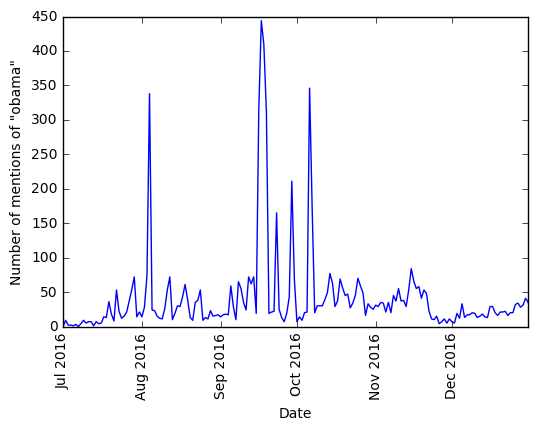

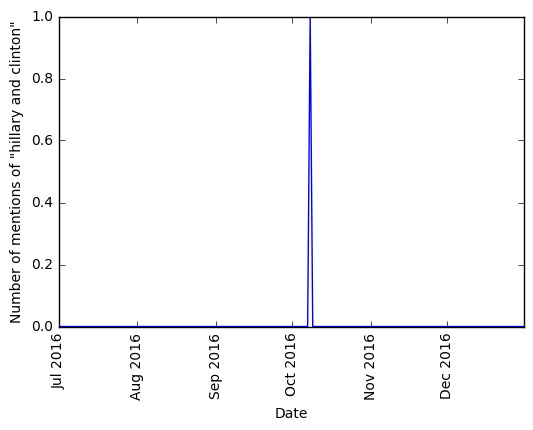

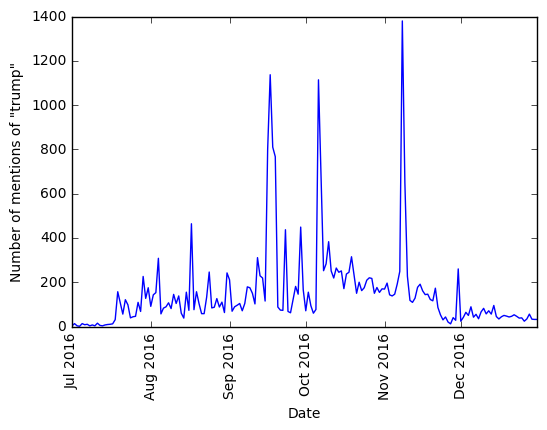

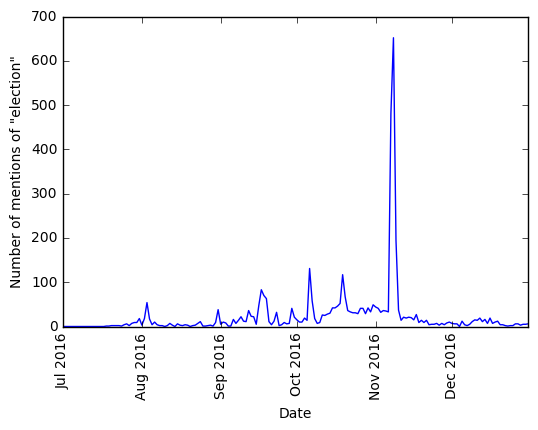

In [15]:
# Does the same as above, but looking at the election season
July1 = datetime.date(2016, 7, 1)
December31 = datetime.date(2016, 12, 31)

for word in selected.keys():
    PlotMentions(GetDates(word), word, (July1, December31))

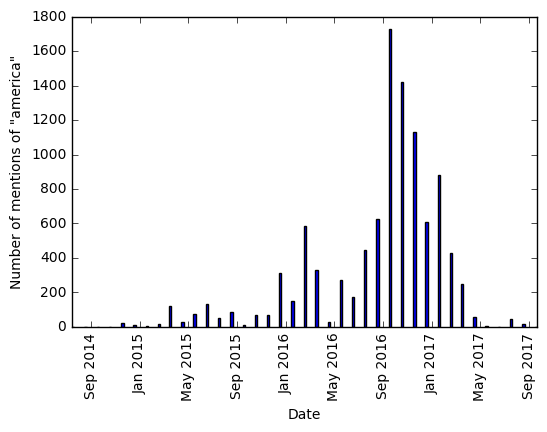

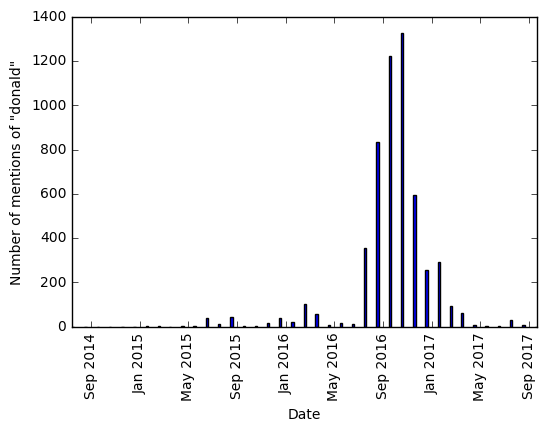

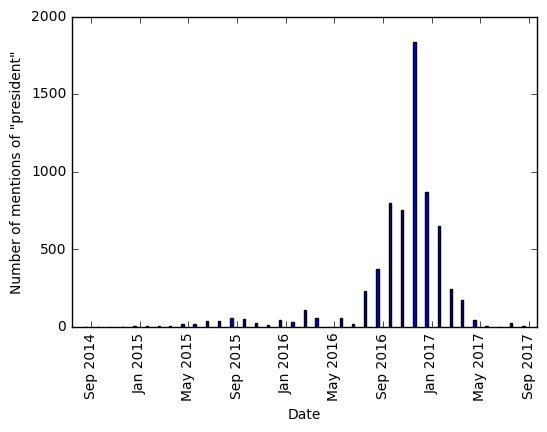

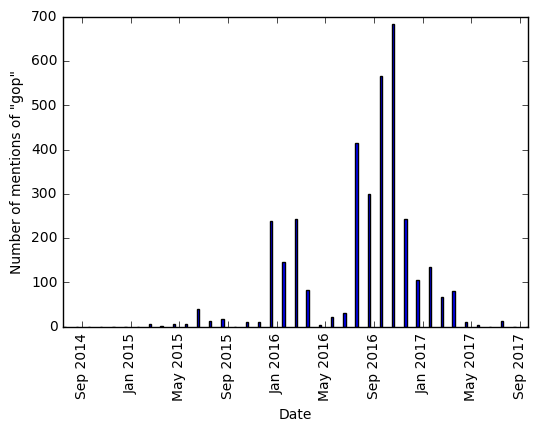

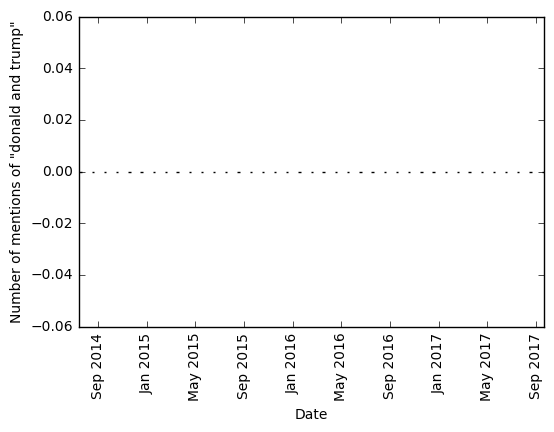

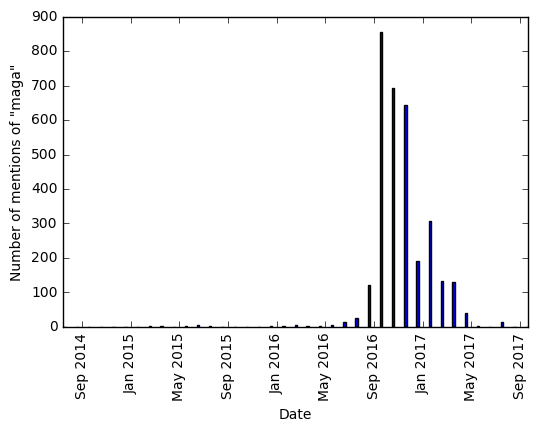

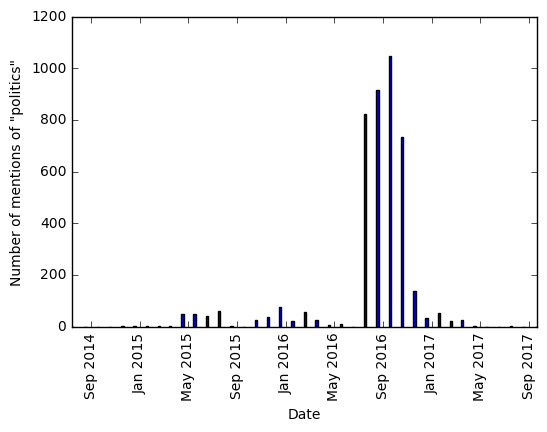

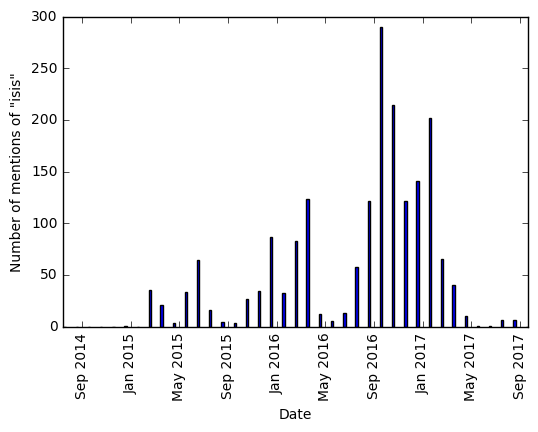

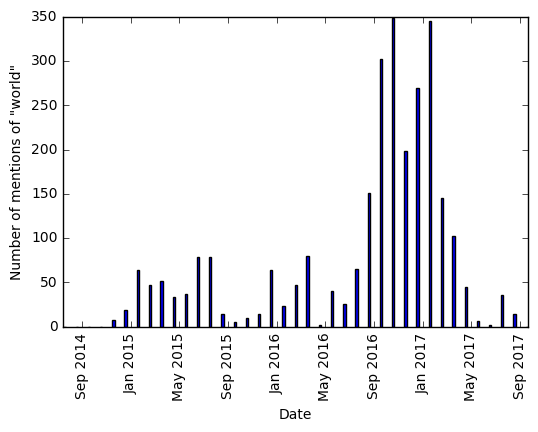

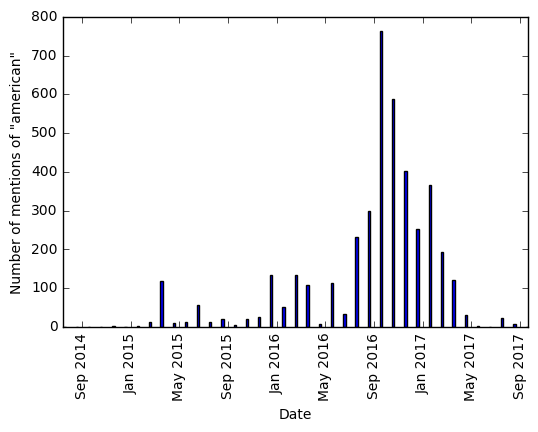

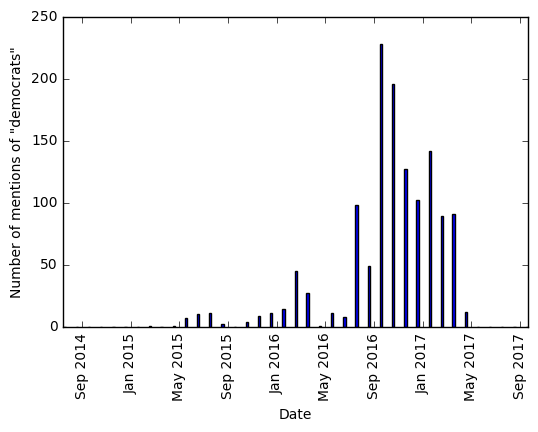

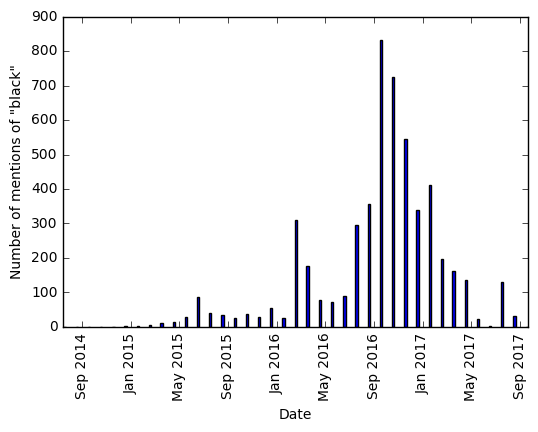

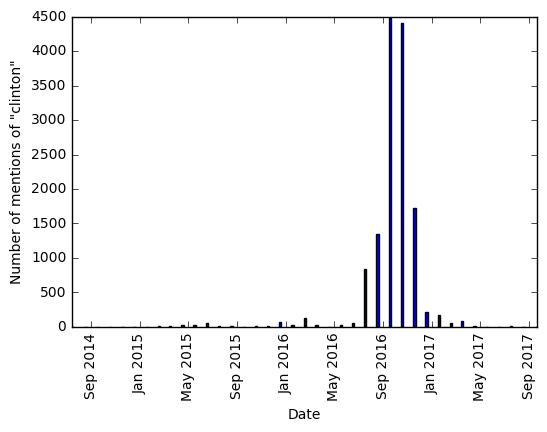

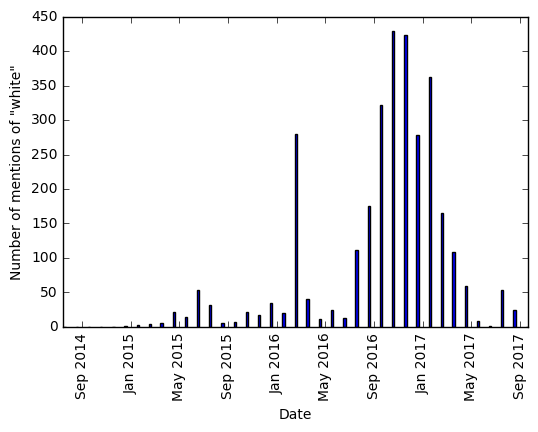

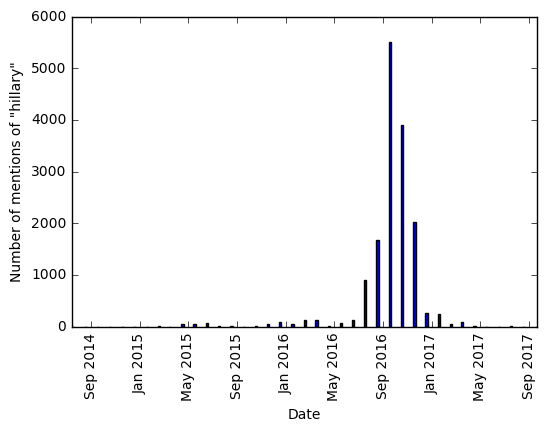

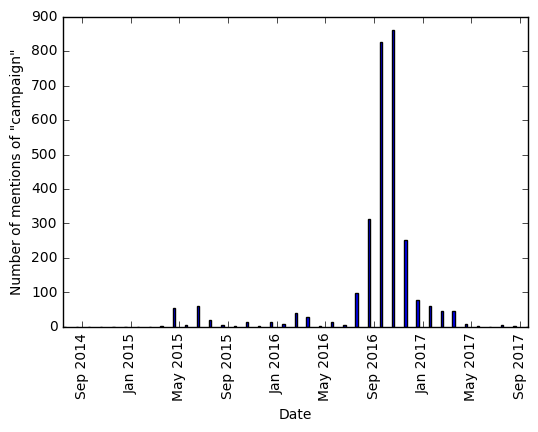

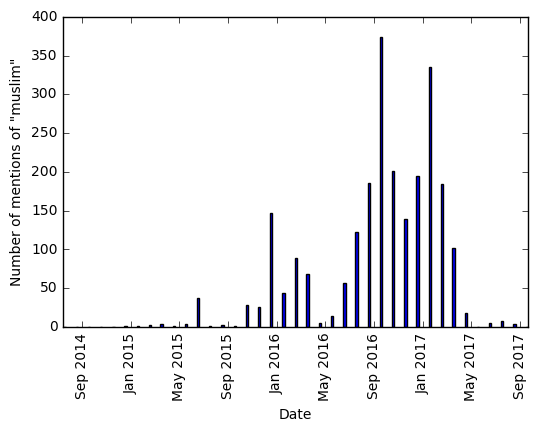

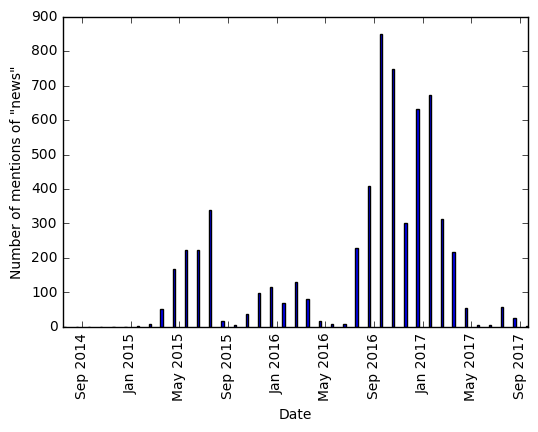

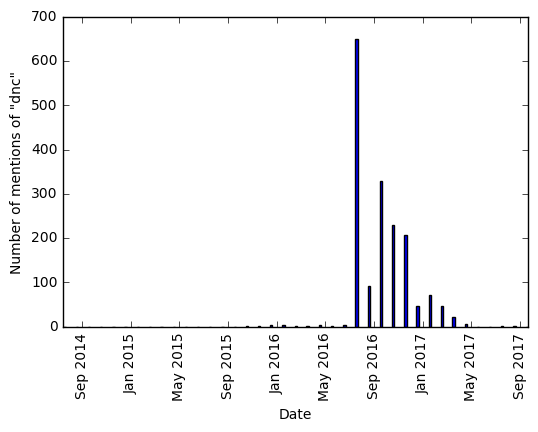

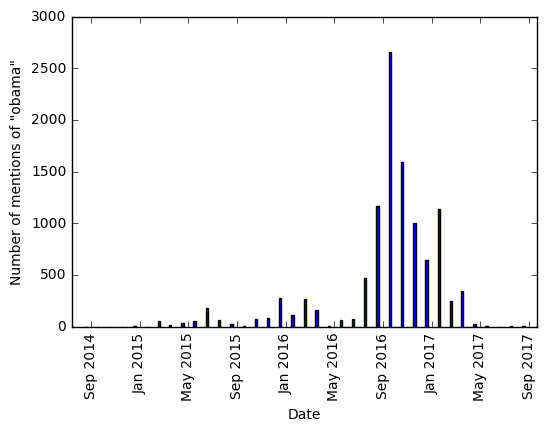

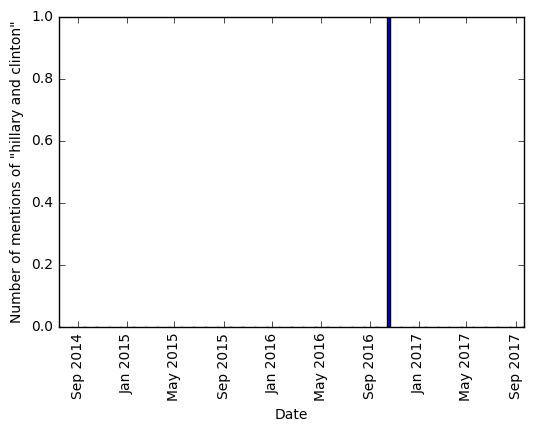

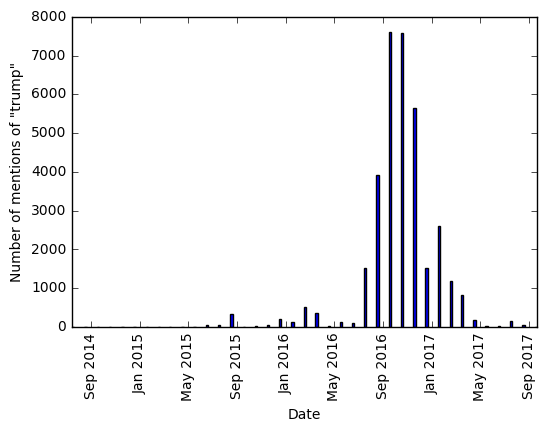

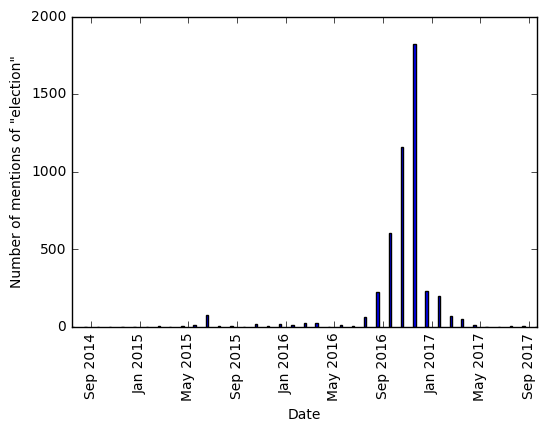

In [16]:
def PlotMentionsByMonth(dates, word):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    if (len(dates) > 0):
        hist = dict()
    
        for date in dates:
            year = date[0].year
            month = date[0].month
            day = 15
            
            if datetime.date(year, month, day) in hist:
                hist[datetime.date(year, month, day)] += date[1]
            else:
                hist[datetime.date(year, month, day)] = date[1]
        
        orderDateCount = sorted(hist.items(), key=lambda x:x[0], reverse=True)
        
        x_val = [x[0] for x in orderDateCount]
        y_val = [x[1] for x in orderDateCount]
        
        plt.bar(x_val, y_val, color='blue', width=6)
        plt.xticks(rotation=90)
        plt.ylabel("Number of mentions of \"" + word + "\"")
        plt.xlabel("Date")
        plt.show()
    
for word in selected.keys():
    PlotMentionsByMonth(GetDates(word), word)

Mean: 0.0599915228917 mode: 0.0 variance: 0.0824033121581
Percent positive: 0.3251032854613417 Percent negative: 0.1857170962030297 Percent Neutral: 0.48917961833562856


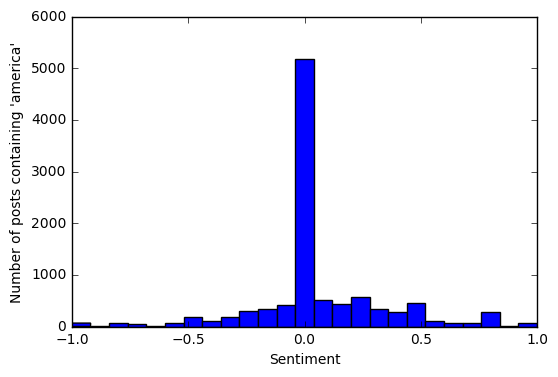

Mean: 0.0473626302421 mode: 0.0 variance: 0.0749881245138
Percent positive: 0.29674945215485754 Percent negative: 0.1672753834915997 Percent Neutral: 0.5359751643535428


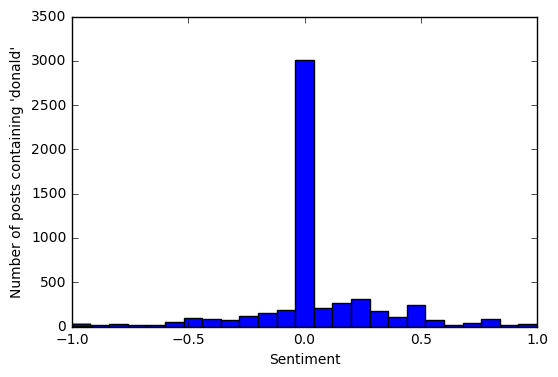

Mean: 0.0657860683833 mode: 0.0 variance: 0.0814192396093
Percent positive: 0.3162354365259495 Percent negative: 0.15494023301558482 Percent Neutral: 0.5288243304584658


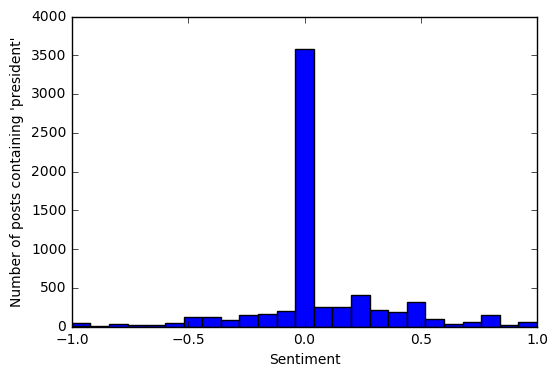

Mean: 0.0414916483157 mode: 0.0 variance: 0.068459540293
Percent positive: 0.28832429346274624 Percent negative: 0.1818441335997716 Percent Neutral: 0.5298315729374822


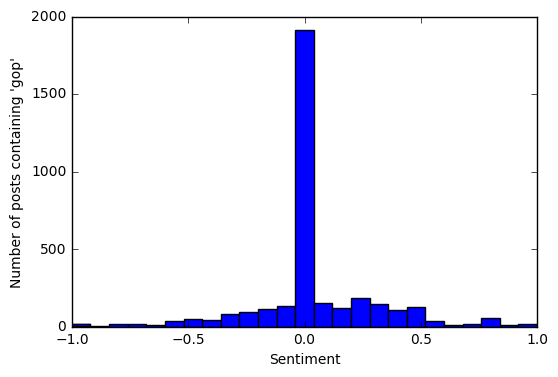

Mean: 0.0647772784397 mode: 0.0 variance: 0.0847486610803
Percent positive: 0.30319148936170215 Percent negative: 0.1677096370463079 Percent Neutral: 0.52909887359199


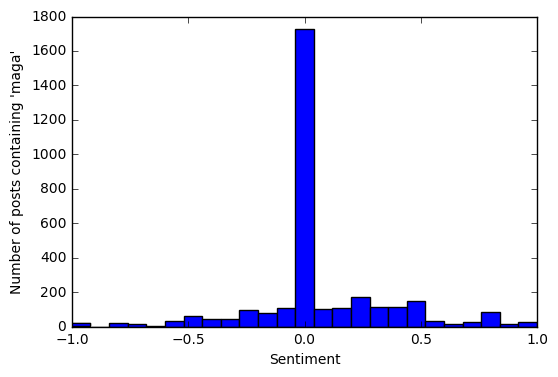

Mean: 0.0328128769628 mode: 0.0 variance: 0.0501696533727
Percent positive: 0.2337935876433419 Percent negative: 0.1376082377720571 Percent Neutral: 0.628598174584601


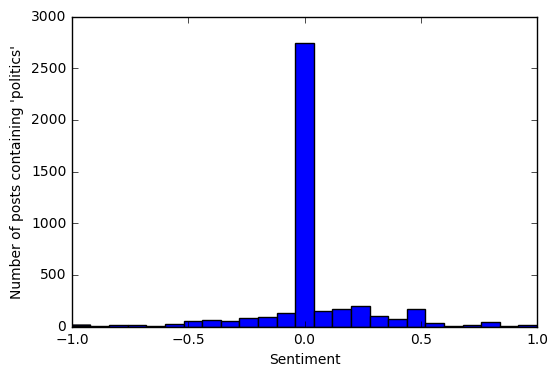

Mean: 0.00423604120936 mode: 0.0 variance: 0.0551196839529
Percent positive: 0.2086864406779661 Percent negative: 0.17584745762711865 Percent Neutral: 0.6154661016949152


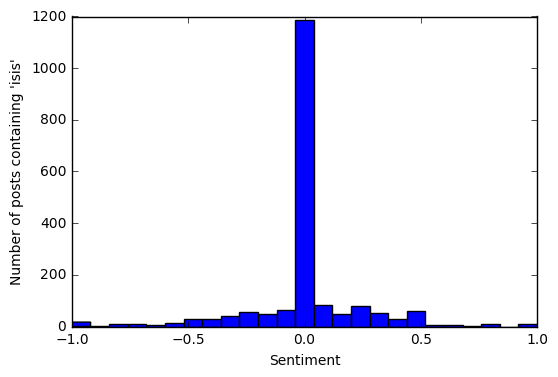

Mean: 0.0642784703951 mode: 0.0 variance: 0.0875227212015
Percent positive: 0.357606344628695 Percent negative: 0.18601297764960345 Percent Neutral: 0.4563806777217015


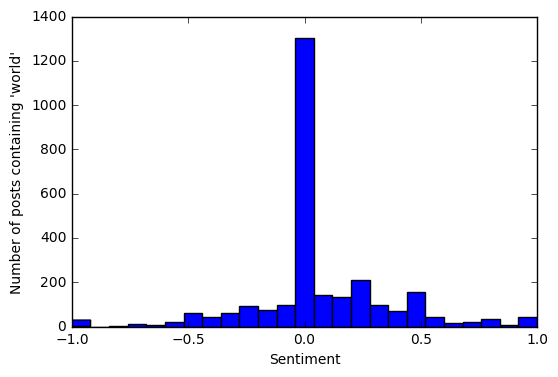

Mean: 0.0312117822433 mode: 0.0 variance: 0.0549513778721
Percent positive: 0.3150784077201447 Percent negative: 0.2180940892641737 Percent Neutral: 0.46682750301568154


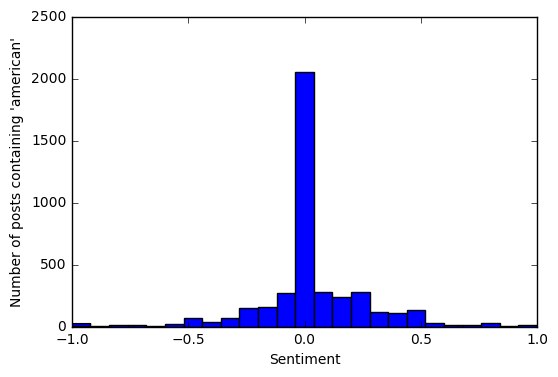

Mean: 0.0162327875778 mode: 0.0 variance: 0.0833759251063
Percent positive: 0.27314814814814814 Percent negative: 0.2222222222222222 Percent Neutral: 0.5046296296296297


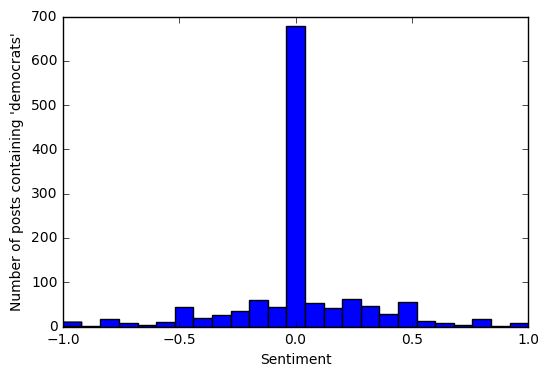

Mean: -0.0288194521194 mode: 0.0 variance: 0.0496884315396
Percent positive: 0.25952470765748775 Percent negative: 0.501886080724255 Percent Neutral: 0.23858921161825727


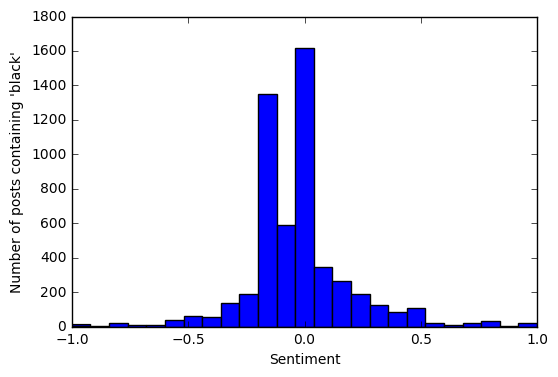

Mean: 0.0253325336214 mode: 0.0 variance: 0.0605288338098
Percent positive: 0.265097755249819 Percent negative: 0.18341781317885592 Percent Neutral: 0.5514844315713251


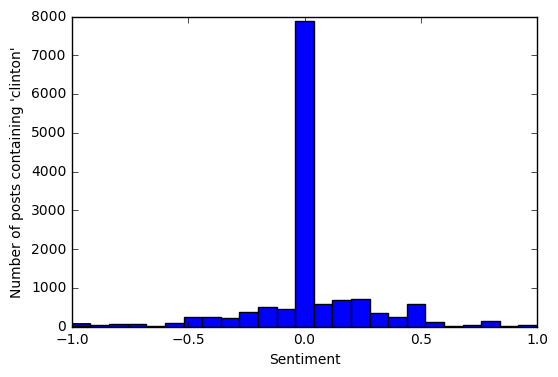

Mean: 0.0100923917304 mode: 0.0 variance: 0.0325231761629
Percent positive: 0.29128074097732354 Percent negative: 0.24624720536569786 Percent Neutral: 0.4624720536569786


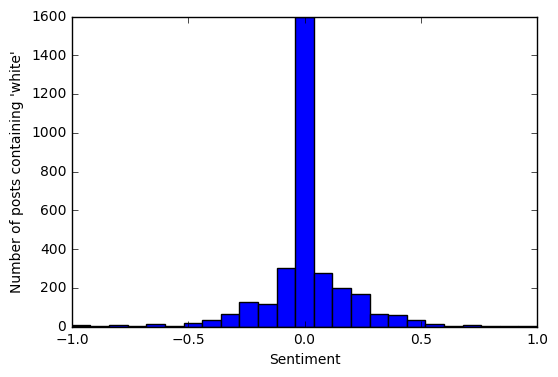

Mean: 0.0181946495265 mode: 0.0 variance: 0.0715293269416
Percent positive: 0.2583802456499488 Percent negative: 0.2100818833162743 Percent Neutral: 0.5315378710337769


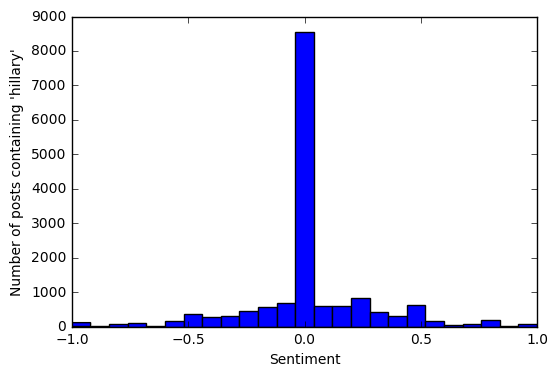

Mean: 0.0330550940661 mode: 0.0 variance: 0.054758801958
Percent positive: 0.26717557251908397 Percent negative: 0.16759195003469812 Percent Neutral: 0.5652324774462179


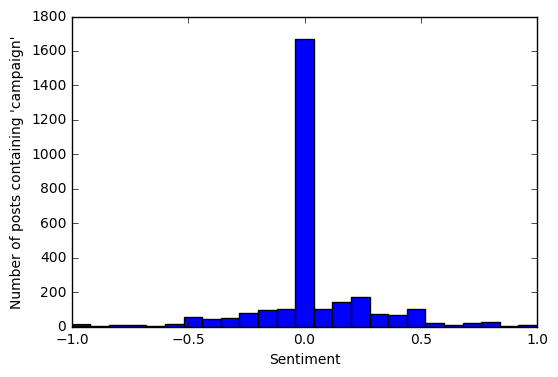

Mean: 0.0313578575808 mode: 0.0 variance: 0.0691473374823
Percent positive: 0.2941666666666667 Percent negative: 0.18125 Percent Neutral: 0.5245833333333333


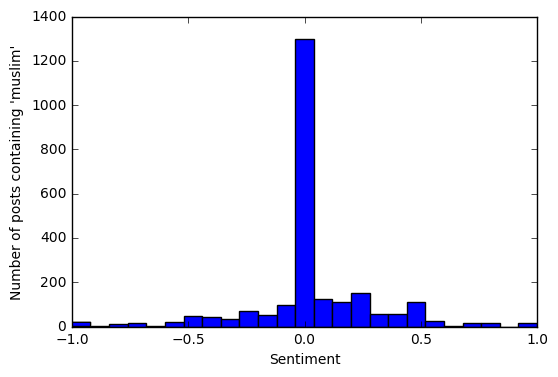

Mean: 0.0162226065161 mode: 0.0 variance: 0.0745852877556
Percent positive: 0.25690021231422505 Percent negative: 0.20921117099461048 Percent Neutral: 0.5338886166911645


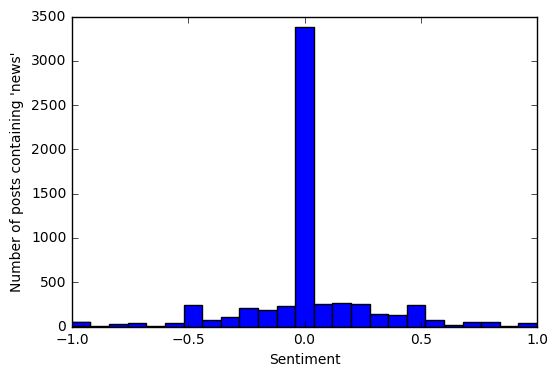

Mean: 0.0188761510899 mode: 0.0 variance: 0.0653184002677
Percent positive: 0.26608695652173914 Percent negative: 0.19826086956521738 Percent Neutral: 0.5356521739130434


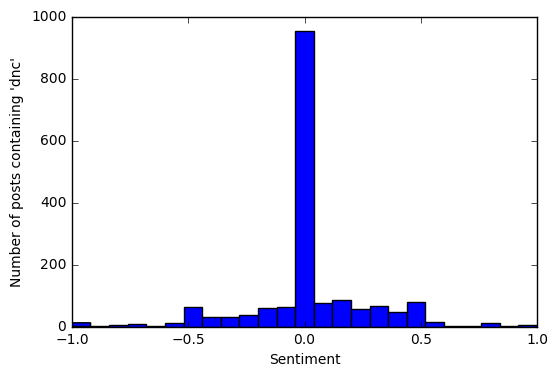

Mean: 0.0237747889127 mode: 0.0 variance: 0.0691838026493
Percent positive: 0.2752788443956848 Percent negative: 0.2057048820625343 Percent Neutral: 0.5190162735417809


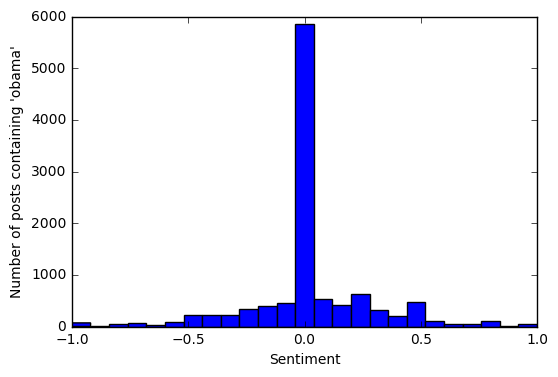

Mean: -0.7 mode: -0.7 variance: 0.0
Percent positive: 0.0 Percent negative: 1.0 Percent Neutral: 0.0


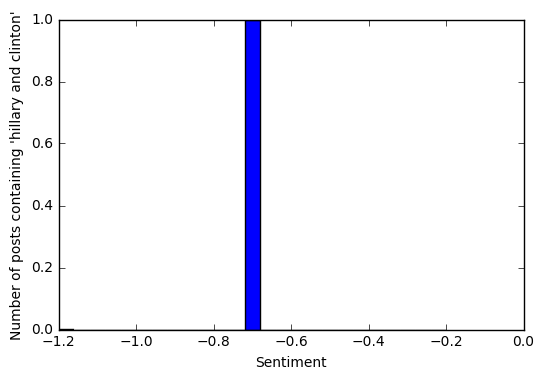

Mean: 0.0462026918081 mode: 0.0 variance: 0.0785199531967
Percent positive: 0.30627263841775426 Percent negative: 0.18794917495544183 Percent Neutral: 0.5057781866268038


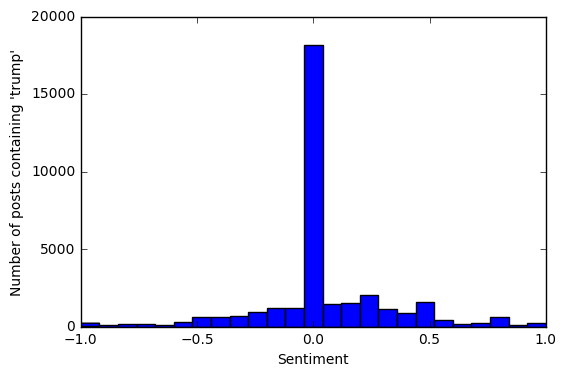

Mean: 0.0425682730667 mode: 0.0 variance: 0.0703557133063
Percent positive: 0.27985395189003437 Percent negative: 0.16709621993127147 Percent Neutral: 0.5530498281786942


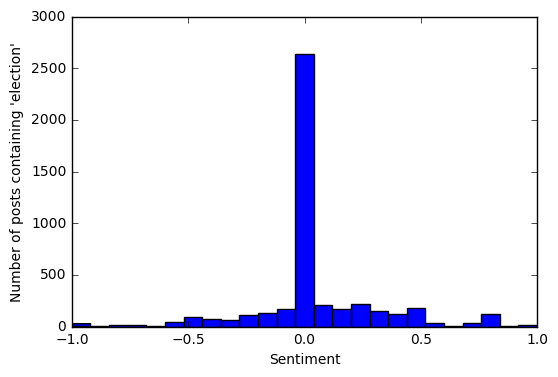

In [17]:
from textblob import TextBlob
from scipy.stats import mode
          
# This block uses Textblob to do a sentiment analysis of each tweet containing a certain word.
# Here, we only look at the number of tweets which Textblob determines to be positive, negative, or neutral,
# ignoring when they were posted

def sentiment(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(clean_tweet(tweet))
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

# Returns the percentage of positive, negative, and neutral tweets for a given word
def Percentages(sentiments):
    percentPositive = 0
    percentNegative = 0
    percentNeutral = 0
    
    for sentiment in sentiments:
        if sentiment > 0:
            percentPositive += 1
        elif sentiment < 0:
            percentNegative += 1
        else:
            percentNeutral += 1
            
    return percentPositive / len(sentiments), percentNegative / len(sentiments), percentNeutral / len(sentiments)

def PlotSentiment(word):
    sent = sentiment(word)
    if (len(sent) != 0):
        percentPositive, percentNegative, percentNeutral = Percentages(sent)
        print("Mean: " + str(np.mean(sent)) + " mode: " + str(mode(sent)[0][0]) + " variance: " + str(np.var(sent)))
        print("Percent positive: " +str(percentPositive) +
              " Percent negative: " + str(percentNegative) + " Percent Neutral: " + str(percentNeutral))
        plt.hist(sent, bins=25)
        plt.ylabel("Number of posts containing \'" + word + "\'")
        plt.xlabel("Sentiment")
        plt.show()

for word in selected:
    PlotSentiment(word)

Mean: 0.0480399387219 mode: 0.0 variance: 0.0806895672851
Percent positive: 0.31043885538303606 Percent negative: 0.18991402540741692 Percent Neutral: 0.499647119209547


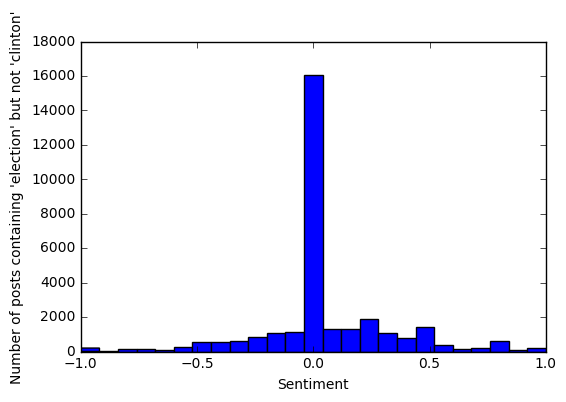

In [18]:
# Plots the sentiments of tweets that contain word1 but not word2
def SentimentWithout(word1, word2):
    tweets = tweets_csv[(tweets_csv['text'].str.contains(word1) == True) & (tweets_csv['text'].str.contains(word2) == False)]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(clean_tweet(tweet))
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def PlotSentiment(word1, word2):
    Sentiment = SentimentWithout(word1, word2)
    if (len(Sentiment) != 0):
        percentPositive, percentNegative, percentNeutral = Percentages(Sentiment)
        print("Mean: " + str(np.mean(Sentiment)) + " mode: " + str(mode(Sentiment)[0][0]) + " variance: " + str(np.var(Sentiment)))
        print("Percent positive: " +str(percentPositive) +
              " Percent negative: " + str(percentNegative) + " Percent Neutral: " + str(percentNeutral))
        plt.hist(Sentiment, bins=25)
        plt.ylabel("Number of posts containing \'" + word1 + "\' but not \'" + word2 + "\'")
        plt.xlabel("Sentiment")
        plt.show()
        
PlotSentiment('trump', 'clinton')

Mean: 0.048935903592 mode: 0.0 variance: 0.079214086991
Percent positive: 0.30856550088915236 Percent negative: 0.17661529342027268 Percent Neutral: 0.5148192056905749


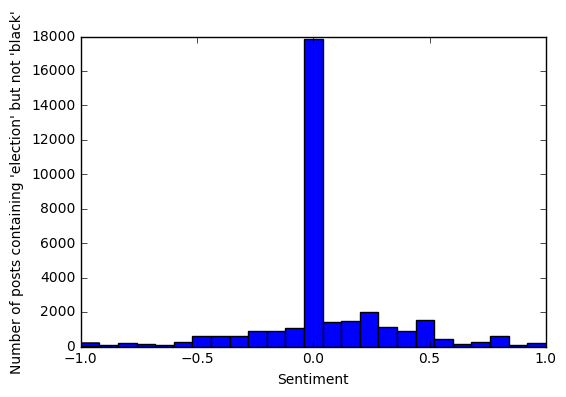

In [19]:
PlotSentiment('trump', 'black')

Mean: 0.027417630163 mode: 0.0 variance: 0.0608714885403
Percent positive: 0.2671998815078131 Percent negative: 0.17336888098940975 Percent Neutral: 0.5594312375027771


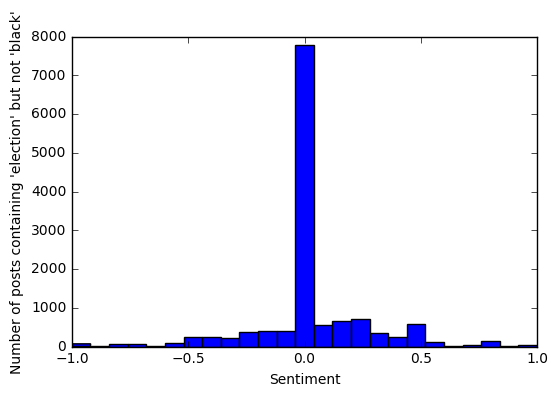

In [20]:
PlotSentiment('clinton', 'black')

Mean: -0.0255897991489 mode: 0.0 variance: 0.0500219857362
Percent positive: 0.2662124060150376 Percent negative: 0.4891917293233083 Percent Neutral: 0.24459586466165414


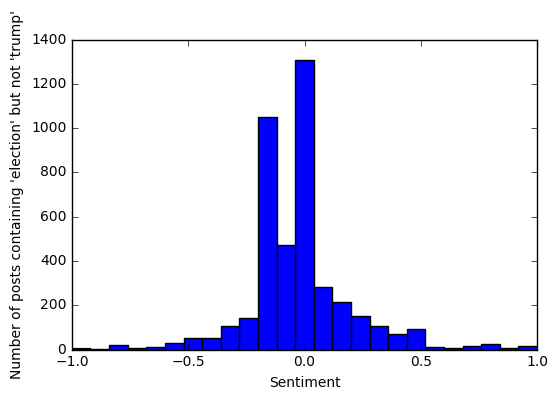

In [21]:
PlotSentiment('black', 'trump')

Mean: -0.0265110639355 mode: 0.0 variance: 0.0503851280442
Percent positive: 0.2648648648648649 Percent negative: 0.4942942942942943 Percent Neutral: 0.24084084084084084


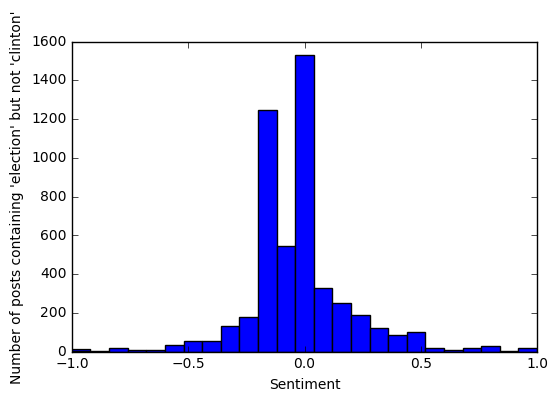

In [29]:
PlotSentiment('black', 'clinton')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.162
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0430
Time:                        18:33:51   Log-Likelihood:                 249.66
No. Observations:                 619   AIC:                            -493.3
Df Residuals:                     616   BIC:                            -480.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0746      0.017      4.418      0.0

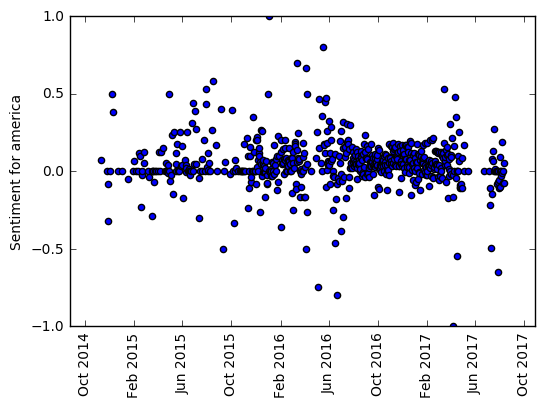

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0640
Time:                        18:34:13   Log-Likelihood:                 130.55
No. Observations:                 421   AIC:                            -255.1
Df Residuals:                     418   BIC:                            -243.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0119      0.028     -0.420      0.6

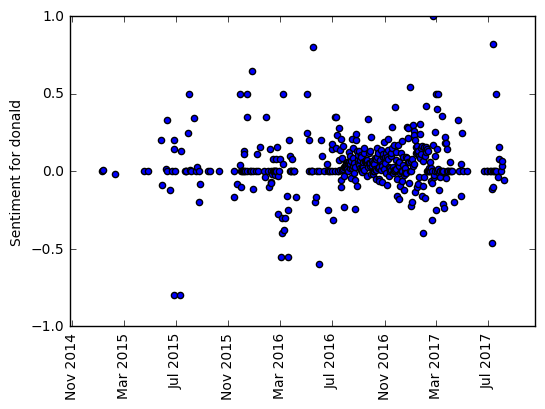

Mean: 0.0461036038135 variance: 0.0471534908145


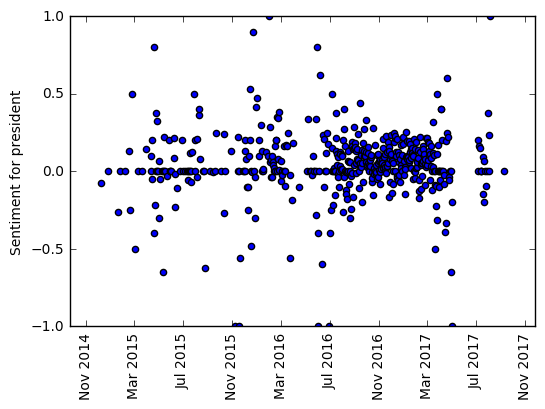

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.857
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0586
Time:                        18:34:53   Log-Likelihood:                 103.11
No. Observations:                 409   AIC:                            -200.2
Df Residuals:                     406   BIC:                            -188.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0959      0.029      3.337      0.0

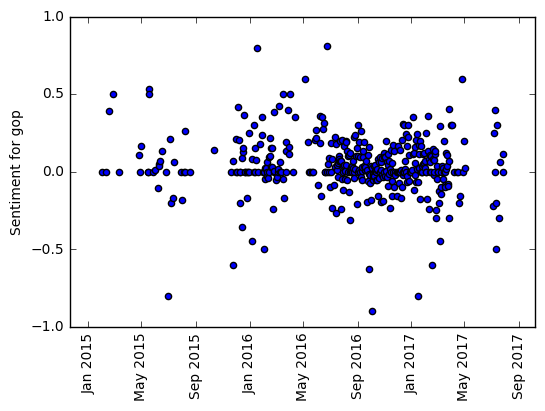

Mean: 0.081472417259 variance: 0.0338026369197


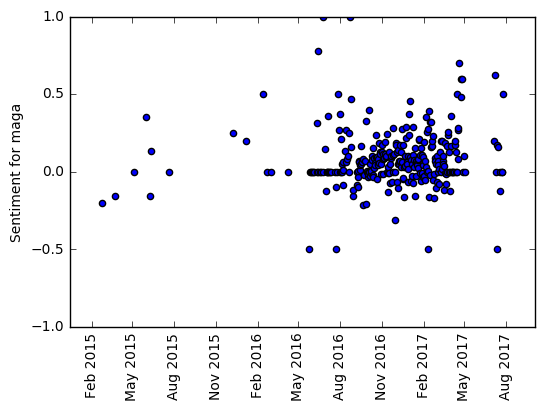

Mean: 0.0383572372628 variance: 0.0359777956673


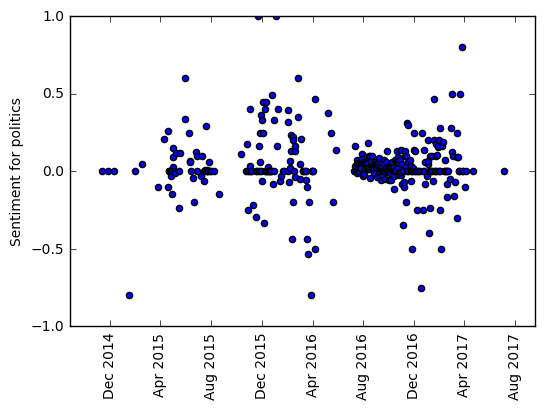

Mean: 0.0184022581309 variance: 0.0277672859624


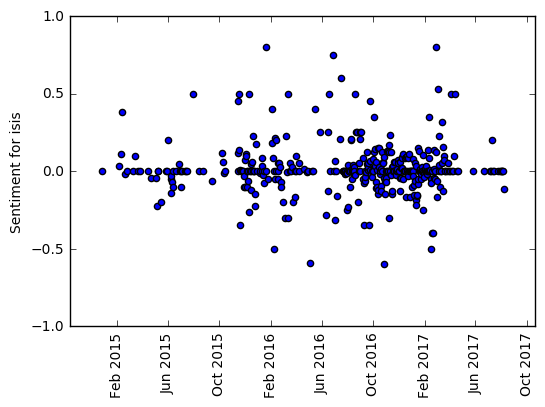

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.513
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0305
Time:                        18:35:24   Log-Likelihood:                 77.544
No. Observations:                 511   AIC:                            -149.1
Df Residuals:                     508   BIC:                            -136.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0866      0.023      3.815      0.0

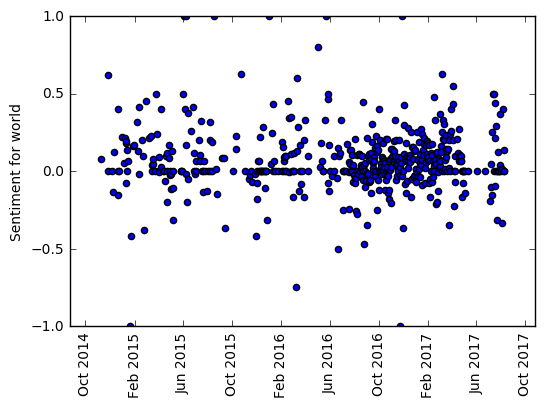

Mean: 0.0340798224891 variance: 0.0256308047725


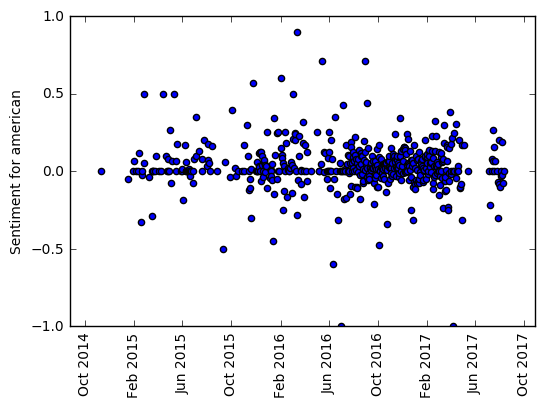

Mean: 0.0106267428453 variance: 0.041560296935


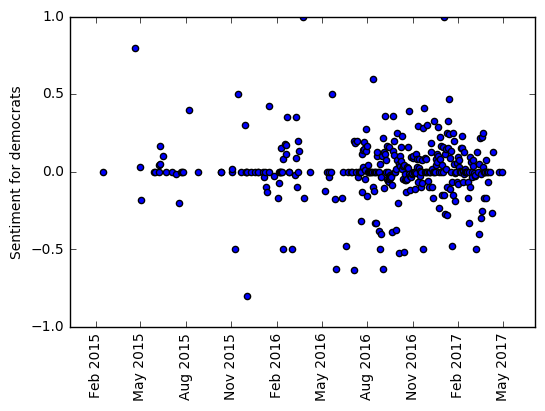

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     6.176
Date:                Tue, 01 May 2018   Prob (F-statistic):            0.00223
Time:                        18:35:56   Log-Likelihood:                 372.98
No. Observations:                 548   AIC:                            -740.0
Df Residuals:                     545   BIC:                            -727.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0210      0.014      1.483      0.1

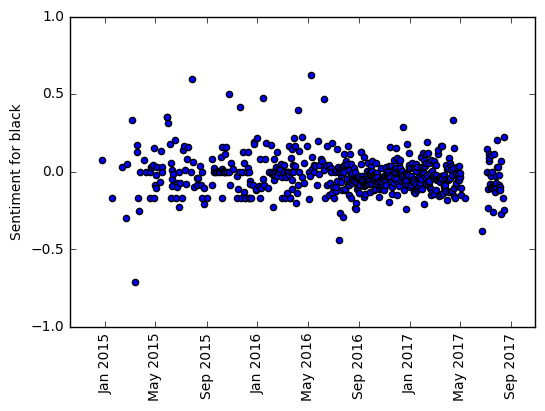

Mean: 0.0373846652722 variance: 0.0287174258756


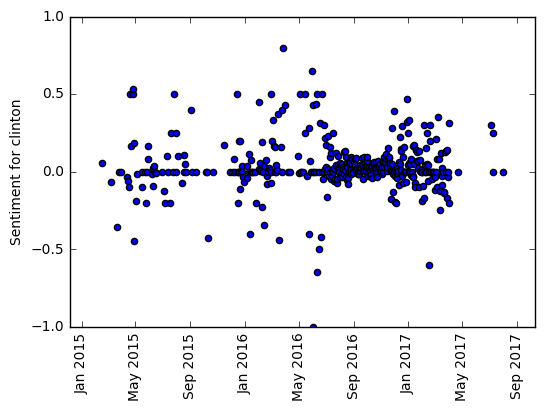

Mean: 0.0148268721788 variance: 0.0127033962134


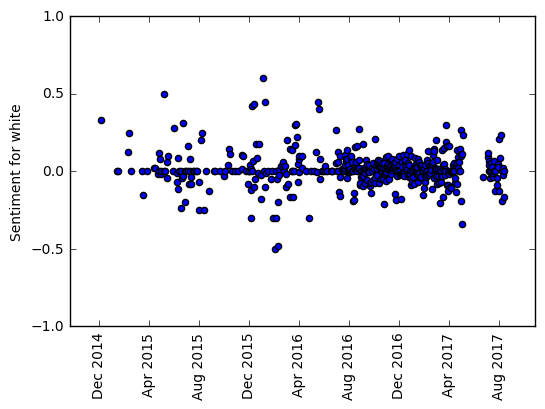

Mean: 0.0286562625766 variance: 0.033190324161


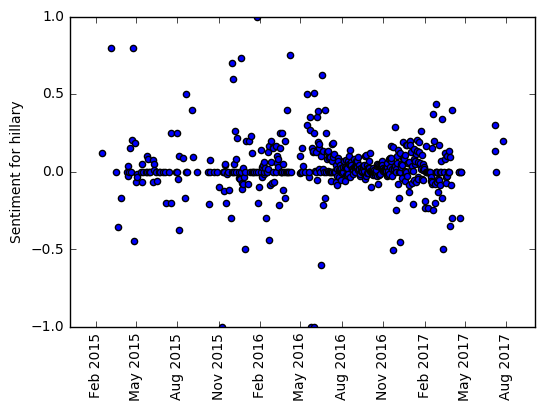

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.734
Date:                Tue, 01 May 2018   Prob (F-statistic):              0.178
Time:                        18:39:56   Log-Likelihood:                 170.40
No. Observations:                 340   AIC:                            -334.8
Df Residuals:                     337   BIC:                            -323.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0795      0.023      3.488      0.0

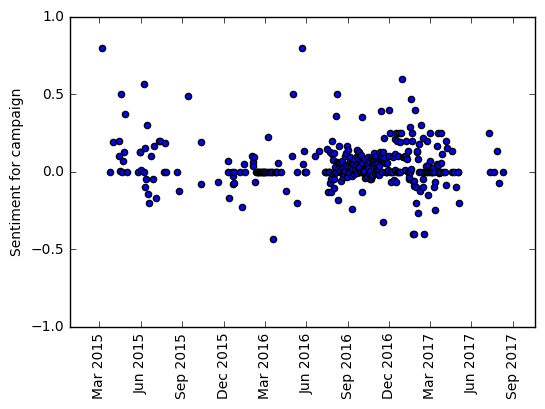

Mean: 0.0241630300547 variance: 0.033202443791


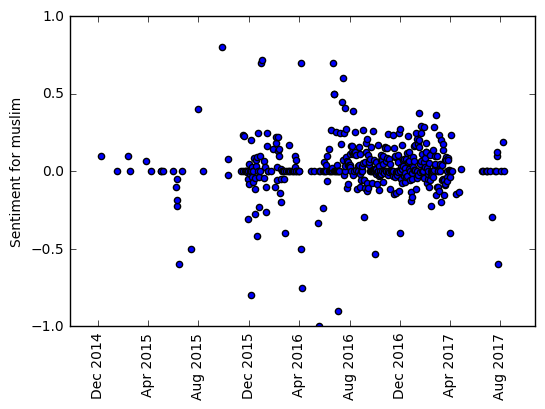

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.475
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0317
Time:                        18:40:27   Log-Likelihood:                 118.12
No. Observations:                 546   AIC:                            -230.2
Df Residuals:                     543   BIC:                            -217.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0705      0.021      3.362      0.0

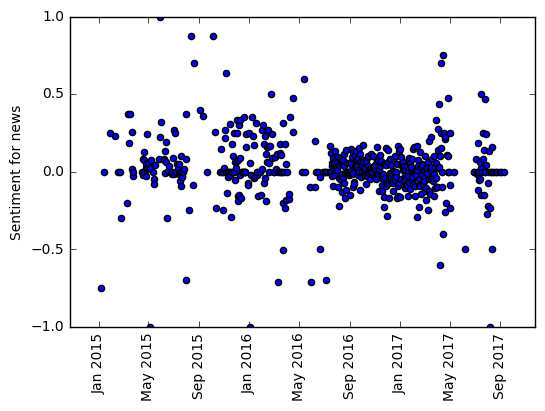

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.507
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0318
Time:                        18:40:31   Log-Likelihood:                 60.520
No. Observations:                 213   AIC:                            -115.0
Df Residuals:                     210   BIC:                            -105.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0919      0.059      1.549      0.1

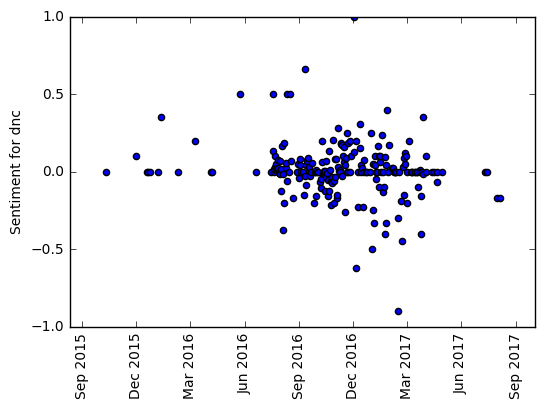

Mean: 0.028363427984 variance: 0.0206379215467


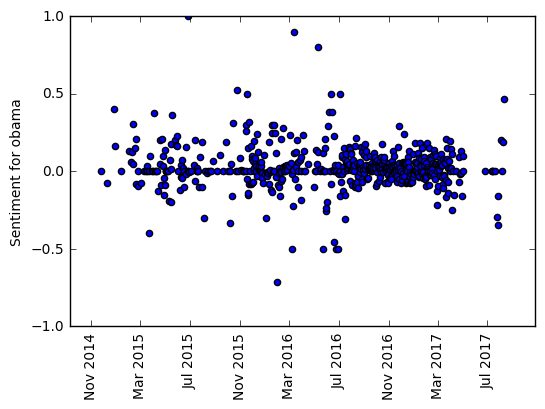

Mean: -0.7 variance: 0.0


C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


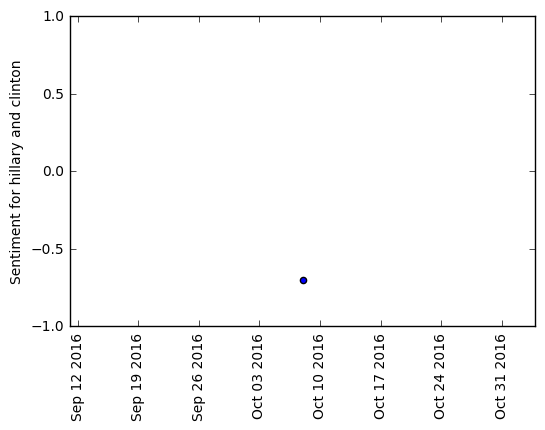

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     11.17
Date:                Tue, 01 May 2018   Prob (F-statistic):           1.74e-05
Time:                        18:51:26   Log-Likelihood:                 256.82
No. Observations:                 569   AIC:                            -507.6
Df Residuals:                     566   BIC:                            -494.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1410      0.020      7.126      0.0

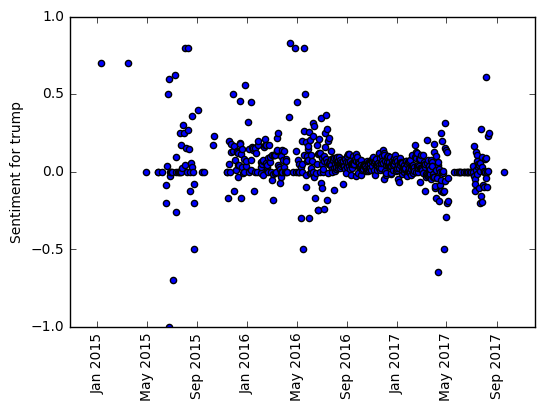

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.641
Date:                Tue, 01 May 2018   Prob (F-statistic):            0.00149
Time:                        18:51:40   Log-Likelihood:                 112.88
No. Observations:                 334   AIC:                            -219.8
Df Residuals:                     331   BIC:                            -208.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1724      0.031      5.525      0.0

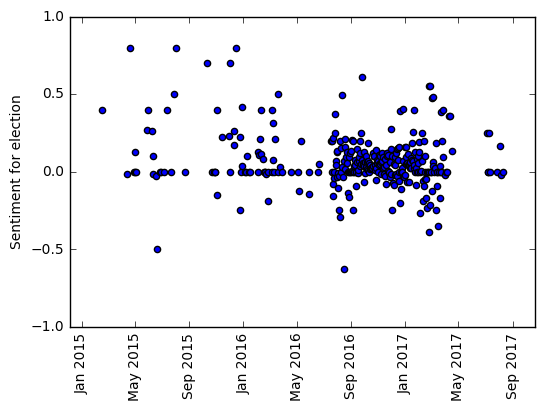

In [31]:
from statsmodels.regression.linear_model import OLS

# In this block, we plot the average sentiment for each day

# helper function to speed things up in SentimentWithTime below
def sentiment(word, df):
    tweets = df[df['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def SentimentWithTime(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
    
    sent = dict()
    
    for index, date in tweets['created_str'].iteritems():
        sameDate = tweets[tweets['created_str'].str[0:10] == (date[0:10])]
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
        if (sdate not in sent):
            sent[sdate] = np.mean(sentiment(word, sameDate))
    
    return sent

def PlotSentimentWithTime(word):
    sent = SentimentWithTime(word)
    
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(sent) > 0):
        RegressSentiment(ordered_sent)
        
        x_val = [x[0] for x in ordered_sent]
        y_val = [x[1] for x in ordered_sent]
        print("Mean: " + str(np.mean(y_val)) + " variance: " + str(np.var(y_val)))
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel("Sentiment for " + word)
        plt.ylim(-1., 1.)
        plt.show()
        
# Attempt to find a linear trend in the sentiment for each day        
def RegressSentiment(ordered_sent):
    if (len(ordered_sent) > 0):
        time0 = ordered_sent[0][0]
    
        # The first column is the intercept, second column is the time, and
        # the third is an indicator for whether it is election season or not
        X = np.ones(shape=(len(ordered_sent), 3))
        for i in range(0, len(ordered_sent)):
            X[i, 1] = (ordered_sent[i][0] - time0).days
            X[i, 2] =  1 if (ordered_sent[i][0] > July1 and ordered_sent[i][0] < December31) else 0
        
        y = np.array([x[1] for x in ordered_sent])
    
        model = OLS(y, X)
        fit = model.fit()
        if (fit.rsquared > 0.01):
            print(fit.summary())

            
for word in selected:
    PlotSentimentWithTime(word)

Mean: 0.0685434916843 variance: 0.0309776465422


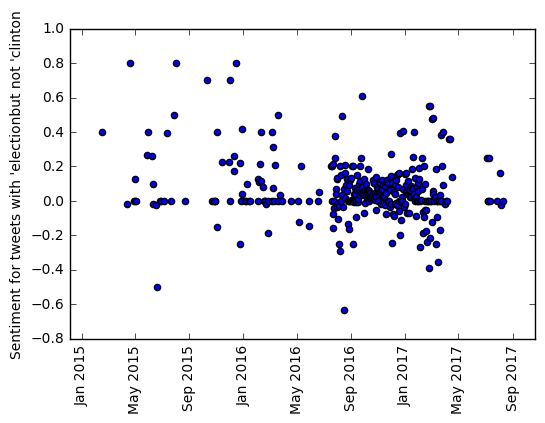

In [30]:
def SentimentWithoutWord(word1, without, df):
    tweets = df[(df['text'].str.contains(word1) == True) & (df['text'].str.contains(without) == False)]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def SentimentWithTime(word1, without):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
    
    sent = dict()
    
    for index, date in tweets['created_str'].iteritems():
        sameDate = tweets[tweets['created_str'].str[0:10] == (date[0:10])]
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
        if (sdate not in sent):
            sent[sdate] = np.mean(sentiment(word, sameDate))
    
    return sent

def PlotSentimentWithTime(word1, without):
    sent = SentimentWithTime(word1, without)
    
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(sent) > 0):
        x_val = [x[0] for x in ordered_sent]
        y_val = [x[1] for x in ordered_sent]
        print("Mean: " + str(np.mean(y_val)) + " variance: " + str(np.var(y_val)))
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel("Sentiment for tweets with \'" + word1 + "but not \'" + without)
        plt.ylim(-1., 1.)
        plt.show()
        
PlotSentimentWithTime("trump", "clinton")

In [20]:
import ast # this is just use to evaluate the lemmas
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

decisionTree = DecisionTreeClassifier()
vectorizer  = TfidfVectorizer()
randomForest = RandomForestClassifier()
ts_test = []

def DataSets(trainingSet, tweets):
   
    tsTrain = trainingSet[:90000]
    tsTest = trainingSet[~trainingSet.ItemID.isin(tsTrain.ItemID)]
    xTrain = vectorizer.fit_transform(tsTrain.text_lemma.astype('unicode')) 
    xTest = vectorizer.transform(tsTest.text_lemma.astype('unicode')) 
    yTrain,yTest = tsTrain['Sentiment'], tsTest['Sentiment']
    xTweet = vectorizer.transform(tweets.text_lemma.astype('unicode'))
        
    return xTrain, yTrain, xTest, yTest, xTweet

def TrainDecisionTree(xTrain, yTrain, xTest, yTest):
    ## Classifications are under Sentiment: 0=neg and 1=pos
    ## SetimentText==Tweets    
    t0 = time.time()
    decisionTree = decisionTree.fit(xTrain,yTrain)
            
    t1 = time.time()
    testPrediction = decisionTree.predict(xTest)
    t2 = time.time()
    print('Time taken to train '+str(t1-t0))
    print('Time taken to predict '+str(t2-t1))
            
    print(classification_report(yTest, testPrediction))
            
    return decisionTree
        
    
def Tree(xTweet):
                
    predictTweets = decisionTree.predict(xTweet)
    tweetProb = decisionTree.predict_proba(xTweet) # <- not using this, here in case we want it
    return predictTweets


def TrainForest(xTrain,yTrain,xTest,yTest):
    randomForest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
    randomForest.fit(xTrain,yTrain)
    randomForestPrediction = randomForest.predict(xTest)
    accuracy = accuracy_score(yTest,randomForestPrediction)
        
    print(classification_report(yTest, randomForestPrediction))
    
    return randomForest, randomForestPrediction

def Forest(xTweet):
    
    forestPredictTweets = randomForest.predict(xTweet)
    # this function returns an array that has the tweet sentiement in order
    # Can be appended to the original tweet dataframe for further analysis
    return forestPredictTweets

trainingSet = pd.read_csv("training_parsed.csv", index_col=0, encoding='latin-1', header=0)
tweets = pd.read_csv("tweets_parsed.csv", low_memory=False, index_col=0, dtype='object')

xTrain, yTrain, xTest, yTest, xTweet = DataSets(trainingSet, tweets)
randomForest, randomForestPrediction = TrainForest(xTrain, yTrain, xTest, yTest)

             precision    recall  f1-score   support

          0       0.70      0.68      0.69      4001
          1       0.79      0.80      0.80      5988

avg / total       0.75      0.75      0.75      9989



In [82]:
tweets_csv = pd.read_csv("tweets_parsed.csv", low_memory=False, index_col=0, dtype='object')

def sentiment(word):
    tweets = tweets_csv[tweets_csv['text_lemma'].str.contains(word) == True]
    print(tweets.shape)
    
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        tokens = nltk.word_tokenize(tweet)
        vector = vectorizer.transform(tokens)
        analysis = Forest(vector)
        sentiment.append(analysis)
    
    return sentiment

#print(sentiment('fbi'))